<a href="https://colab.research.google.com/github/brfuji/ProjetoFinalTera/blob/main/ProjetoTera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# EDA


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Wednesday.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Monday.csv')
df3 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Tuesday.csv')
df4 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Friday1.csv')
df5 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Friday2.csv')
df6 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Friday3.csv')
df7 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Thursday1.csv')
df8 = pd.read_csv('/content/drive/MyDrive/ProjetoTera/Thursday2.csv')

In [ ]:
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max          

In [ ]:
df.columns = df.columns.str.replace(' ', '')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   DestinationPort          int64  
 1   FlowDuration             int64  
 2   TotalFwdPackets          int64  
 3   TotalBackwardPackets     int64  
 4   TotalLengthofFwdPackets  int64  
 5   TotalLengthofBwdPackets  int64  
 6   FwdPacketLengthMax       int64  
 7   FwdPacketLengthMin       int64  
 8   FwdPacketLengthMean      float64
 9   FwdPacketLengthStd       float64
 10  BwdPacketLengthMax       int64  
 11  BwdPacketLengthMin       int64  
 12  BwdPacketLengthMean      float64
 13  BwdPacketLengthStd       float64
 14  FlowBytes/s              float64
 15  FlowPackets/s            float64
 16  FlowIATMean              float64
 17  FlowIATStd               float64
 18  FlowIATMax               int64  
 19  FlowIATMin               int64  
 20  FwdIATTotal              int64  
 21  FwdIATMea

In [ ]:
df['Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [ ]:
df.Label.replace({'DoS Hulk':'DoS','DoS GoldenEye':'DoS','DoS slowloris':'DoS','DoS Slowhttptest':'DoS','Web.*':'Web Attack'}, regex=True, inplace=True)

In [ ]:
df['Label'].value_counts()

BENIGN          2273097
DoS              252661
PortScan         158930
DDoS             128027
FTP-Patator        7938
SSH-Patator        5897
Web Attack         2180
Bot                1966
Infiltration         36
Heartbleed           11
Name: Label, dtype: int64

In [ ]:
df.isnull().sum()

DestinationPort            0
FlowDuration               0
TotalFwdPackets            0
TotalBackwardPackets       0
TotalLengthofFwdPackets    0
                          ..
IdleMean                   0
IdleStd                    0
IdleMax                    0
IdleMin                    0
Label                      0
Length: 79, dtype: int64

In [ ]:
df.duplicated().sum()

308381

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.99])

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,act_data_pkt_fwd,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
count,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,...,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06,2.520798e+06
mean,8.690590e+03,1.659161e+07,1.028174e+01,1.157280e+01,6.119477e+02,1.814440e+04,2.312292e+02,1.920349e+01,6.350497e+01,7.732347e+01,...,6.009478e+00,-3.082233e+03,9.157847e+04,4.619177e+04,1.720171e+05,6.546359e+04,9.337367e+06,5.657941e+05,9.763770e+06,8.892671e+06
std,1.901280e+04,3.523276e+07,7.944201e+02,1.056922e+03,1.058827e+04,2.398177e+06,7.563755e+02,6.079834e+01,1.955526e+02,2.968814e+02,...,6.744150e+02,1.149758e+06,6.866503e+05,4.165844e+05,1.085571e+06,6.111585e+05,2.484818e+07,4.874169e+06,2.561746e+07,2.458143e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10%,5.300000e+01,5.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,2.080000e+02,2.000000e+00,1.000000e+00,1.200000e+01,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,5.062200e+04,2.000000e+00,2.000000e+00,6.600000e+01,1.560000e+02,4.000000e+01,2.000000e+00,3.625000e+01,0.000000e+00,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,5.333340e+06,6.000000e+00,5.000000e+00,3.320000e+02,9.970000e+02,2.020000e+02,3.700000e+01,5.200000e+01,7.419280e+01,...,3.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
99%,6.192400e+04,1.179112e+08,5.100000e+01,6.200000e+01,1.160600e+04,8.190909e+04,3.388000e+03,7.800000e+01,1.326467e+03,1.196213e+03,...,2.900000e+01,4.000000e+01,2.712133e+06,1.241260e+06,4.474314e+06,1.910901e+06,9.980000e+07,2.300000e+07,9.990000e+07,9.980000e+07
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [ ]:
df.describe(include='object')

,Label
count,2520798
unique,10
top,BENIGN
freq,2095057


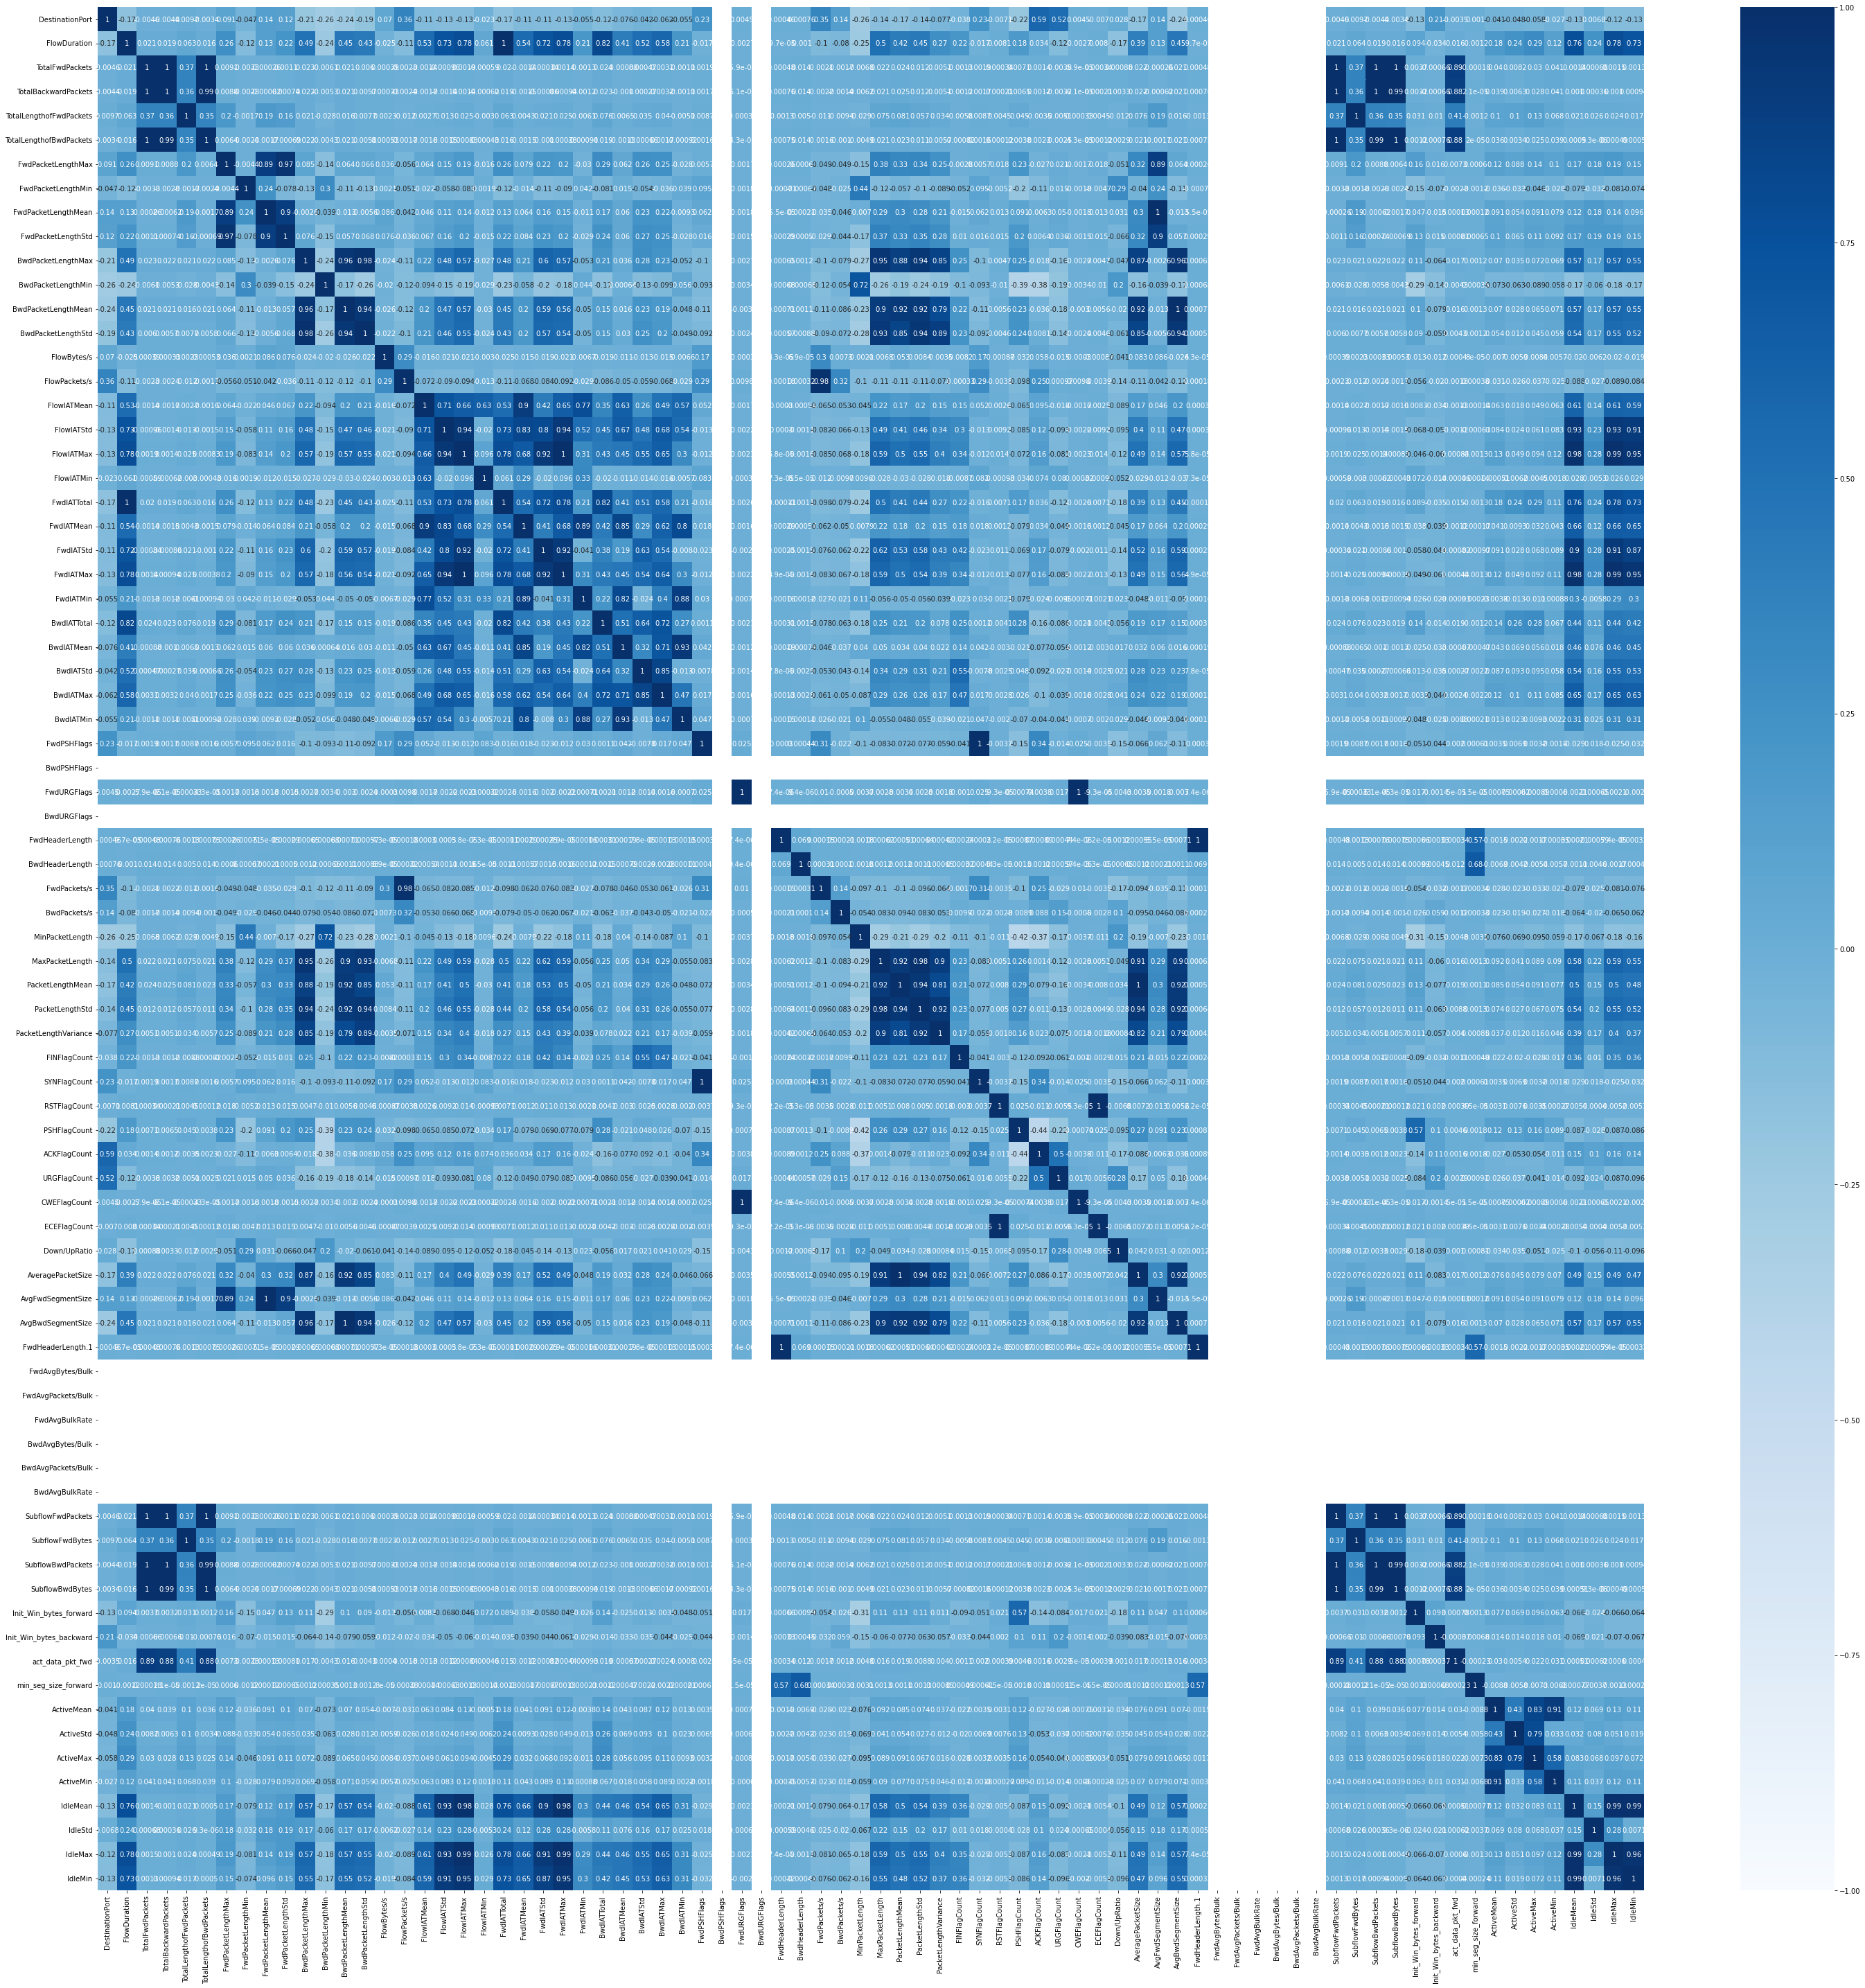

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(data=df.corr(), vmin=-1,vmax=1, cmap='Blues', annot=True)

In [ ]:
df.drop(['BwdPSHFlags'], axis=1, inplace=True)
df.drop(['BwdURGFlags'], axis=1, inplace=True)
df.drop(['FwdAvgBytes/Bulk'], axis=1, inplace=True)
df.drop(['FwdAvgBulkRate'], axis=1, inplace=True)
df.drop(['FwdAvgPackets/Bulk'], axis=1, inplace=True)
df.drop(['BwdAvgBytes/Bulk'], axis=1, inplace=True)
df.drop(['BwdAvgPackets/Bulk'], axis=1, inplace=True)
df.drop(['BwdAvgBulkRate'], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

TypeError: ignored

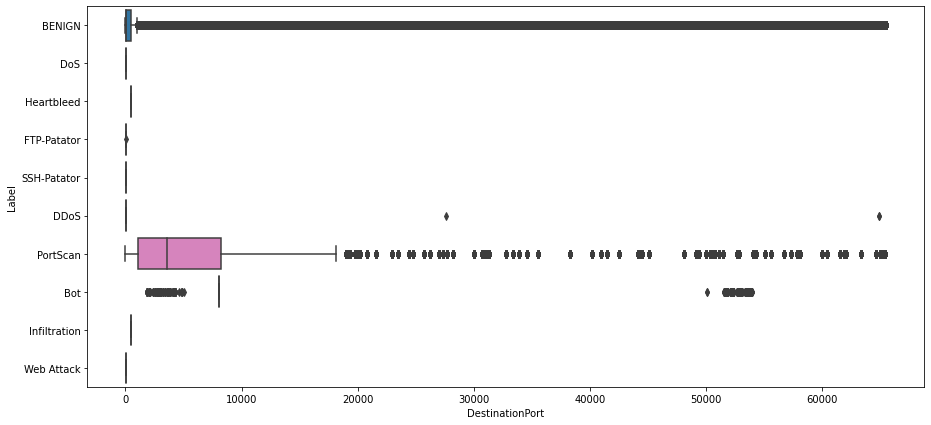

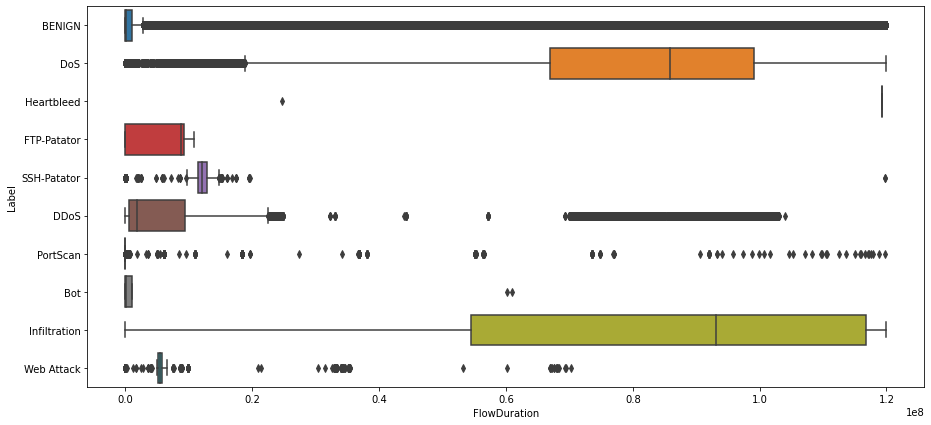

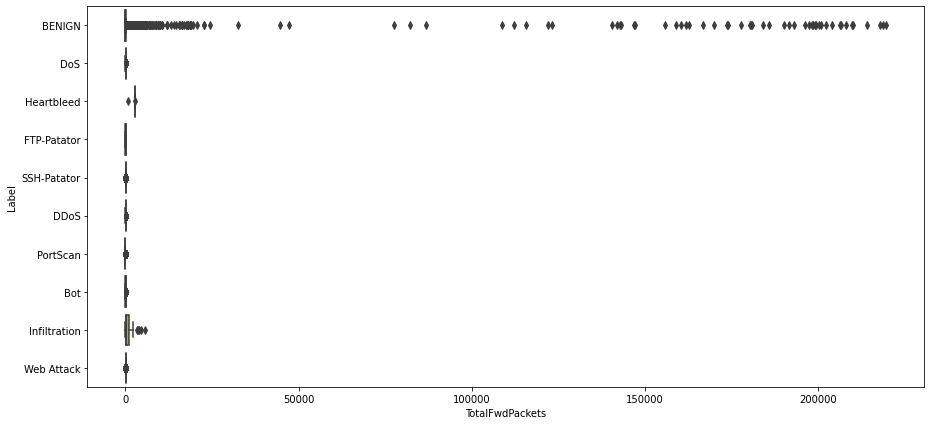

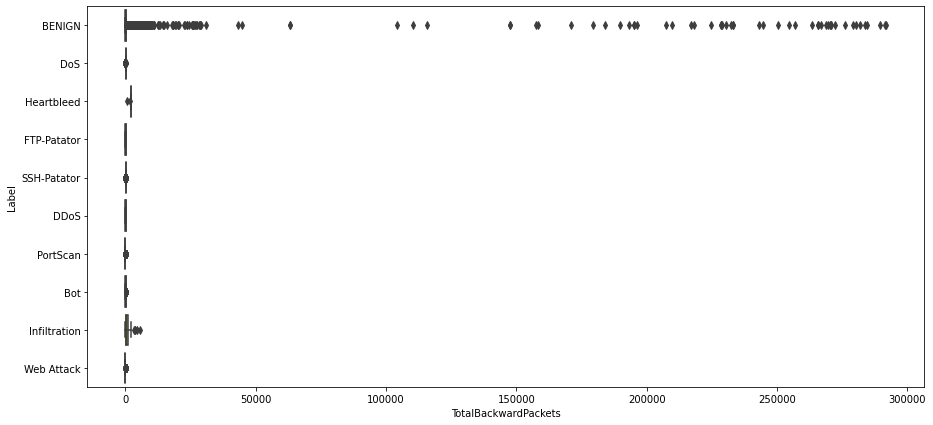

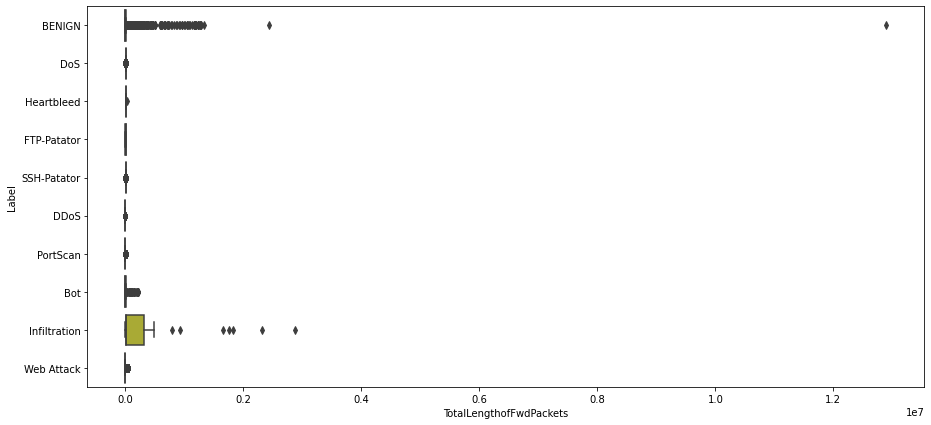

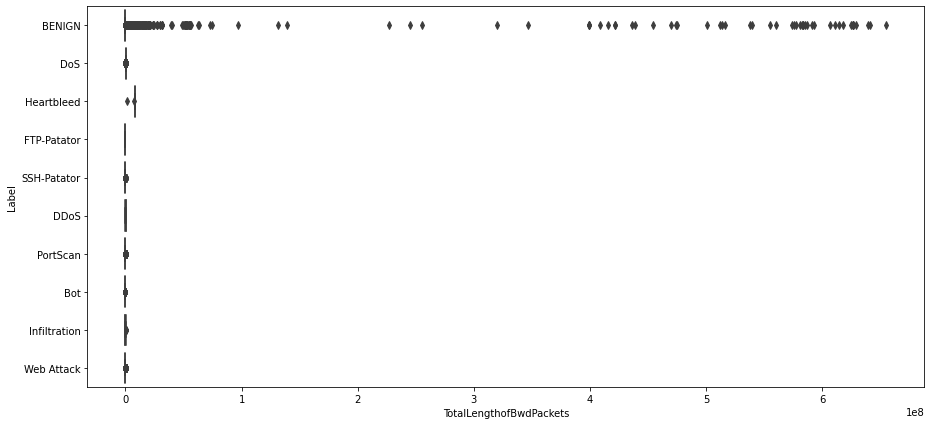

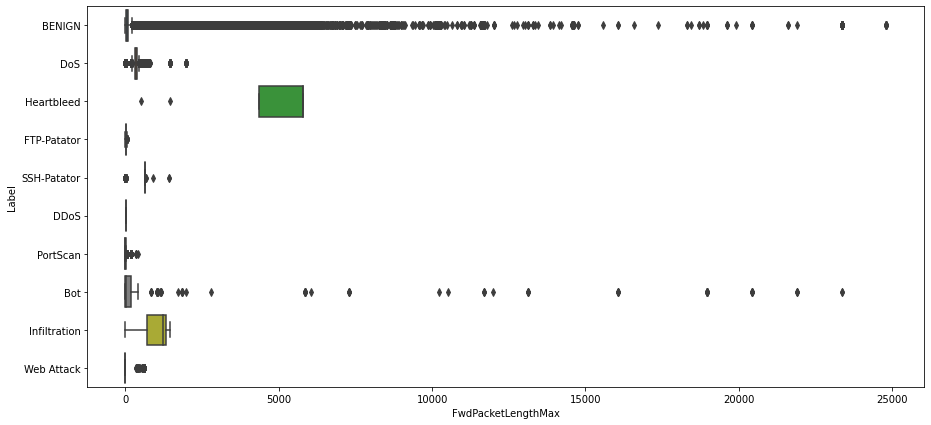

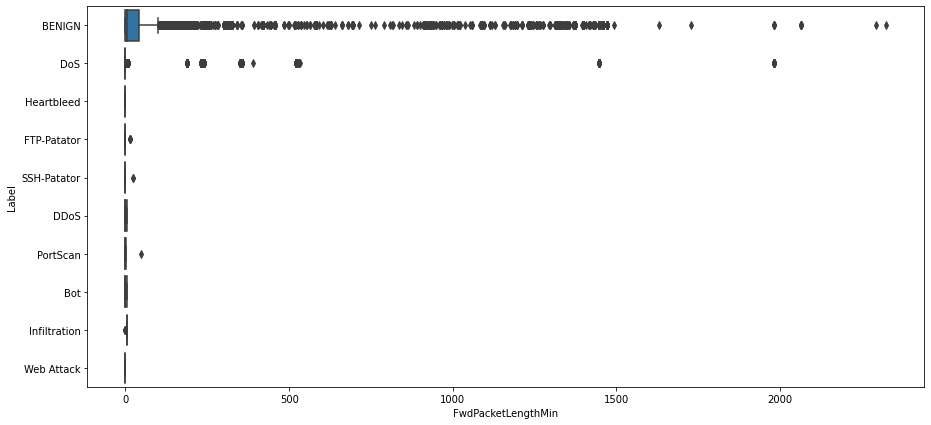

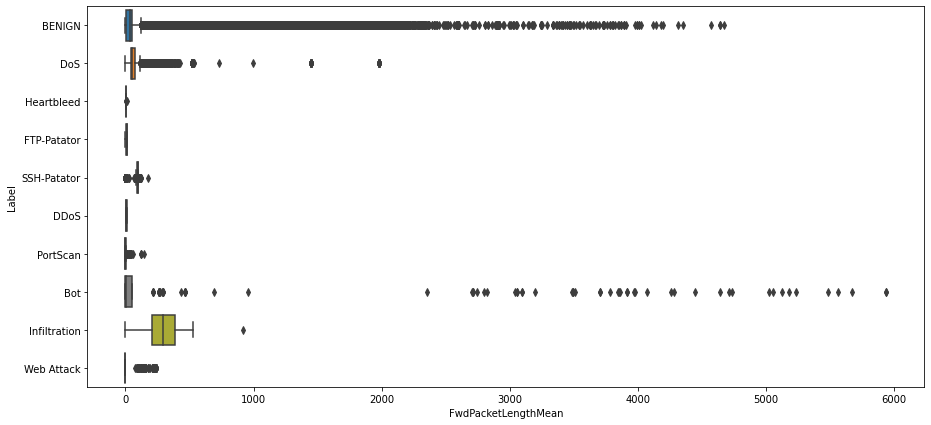

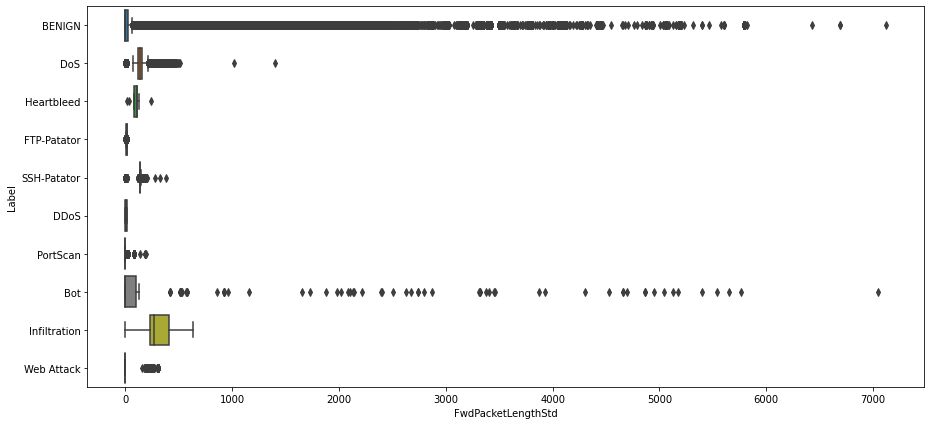

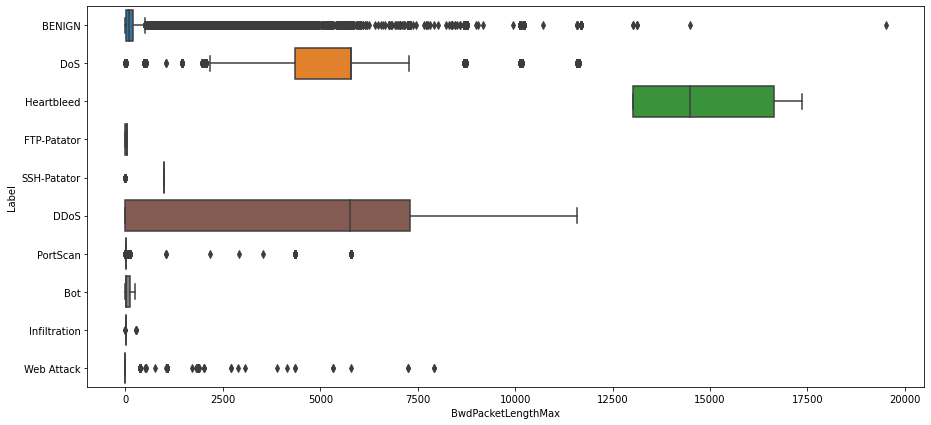

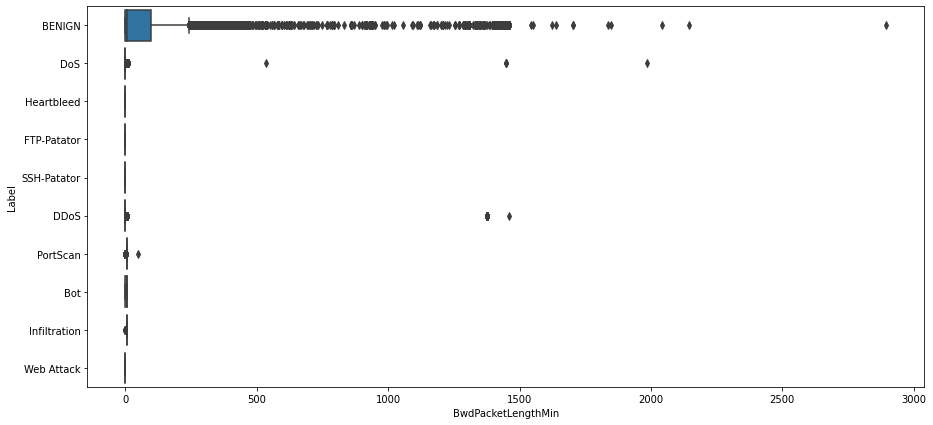

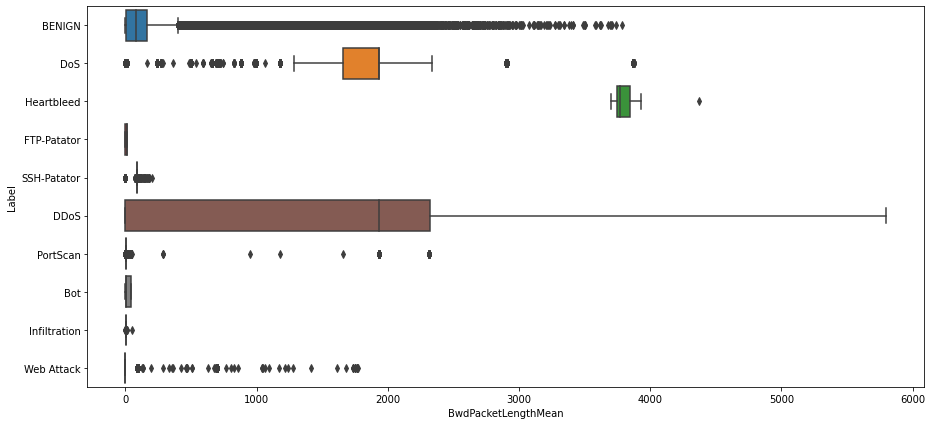

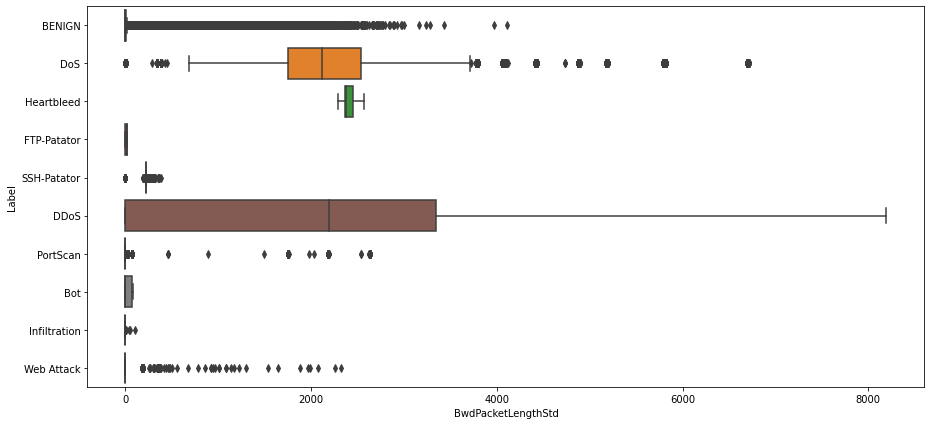

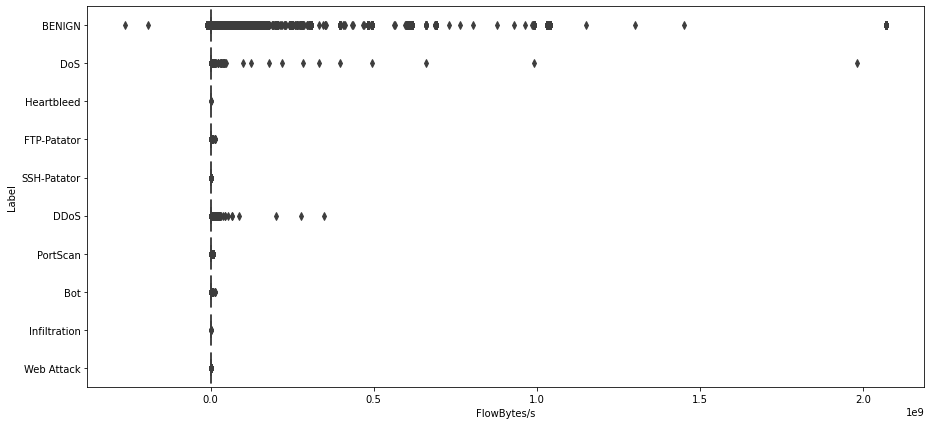

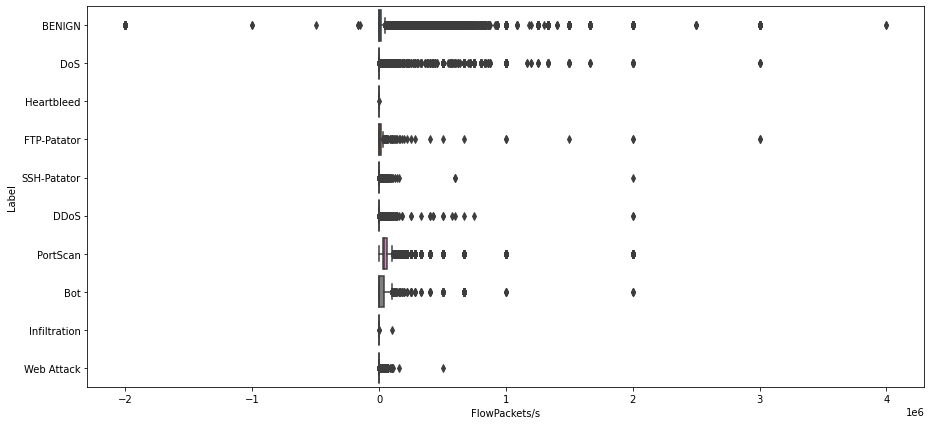

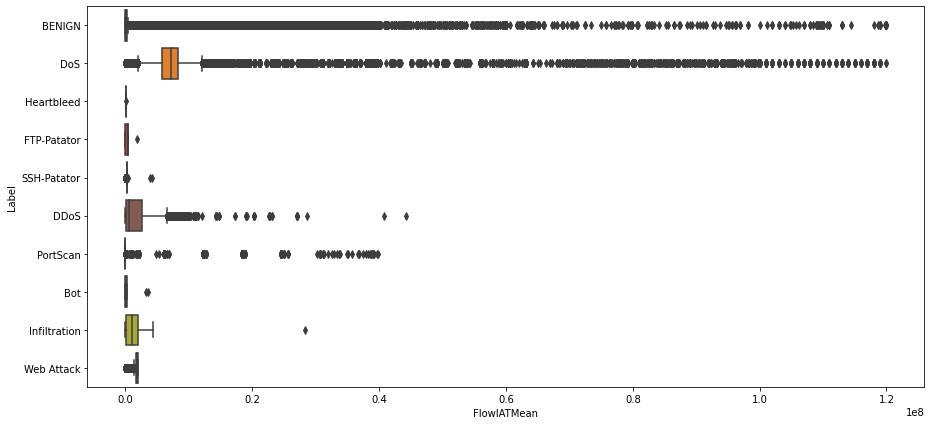

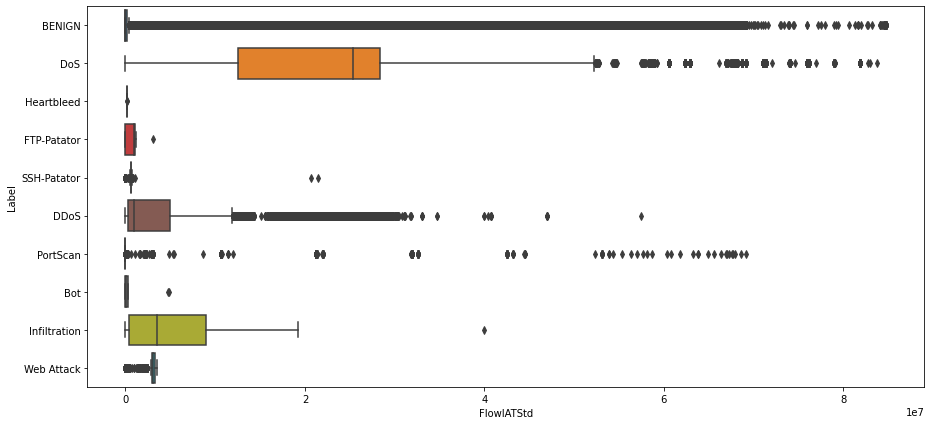

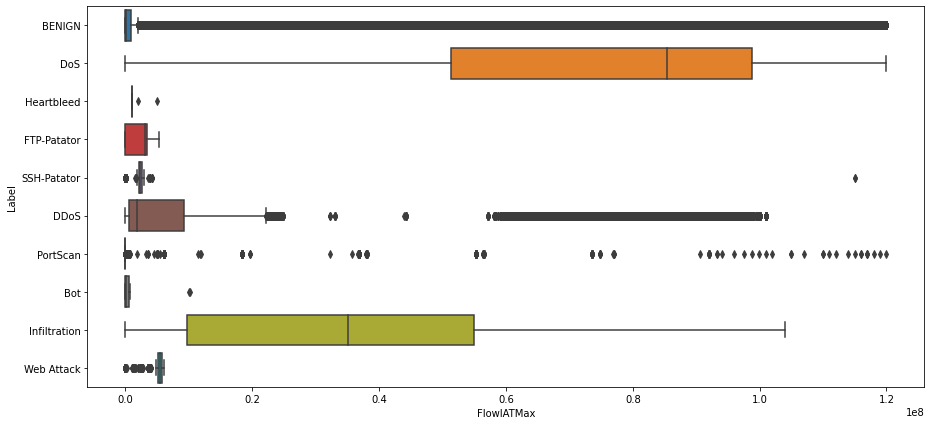

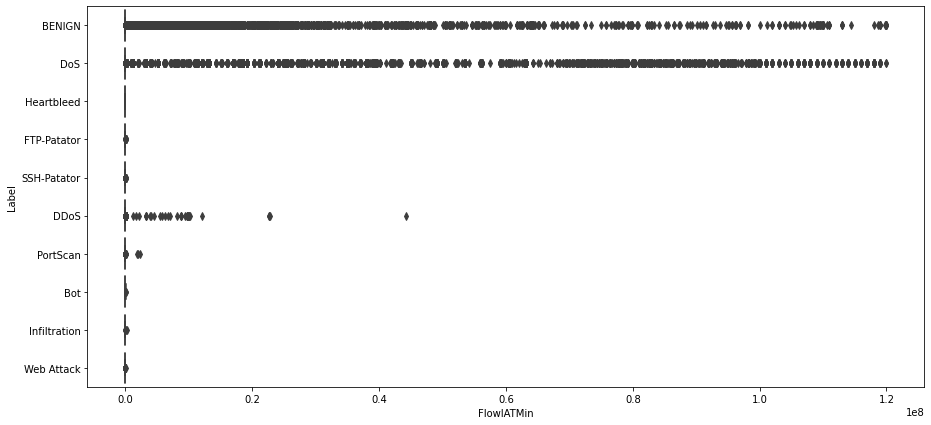

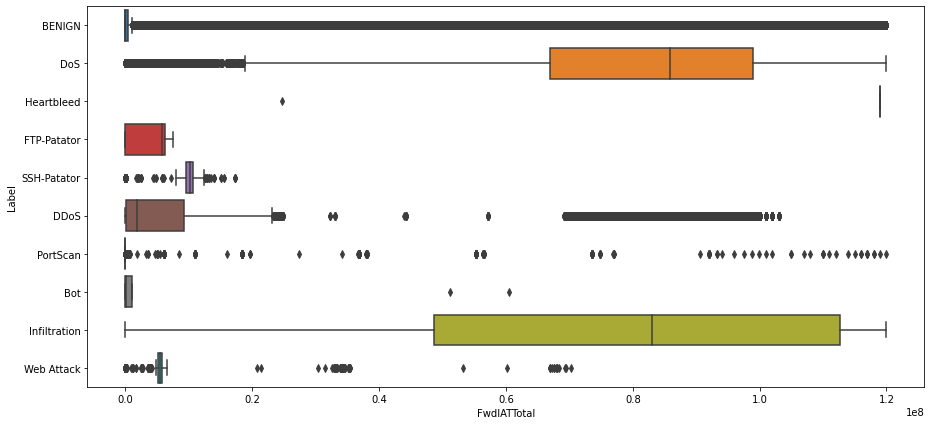

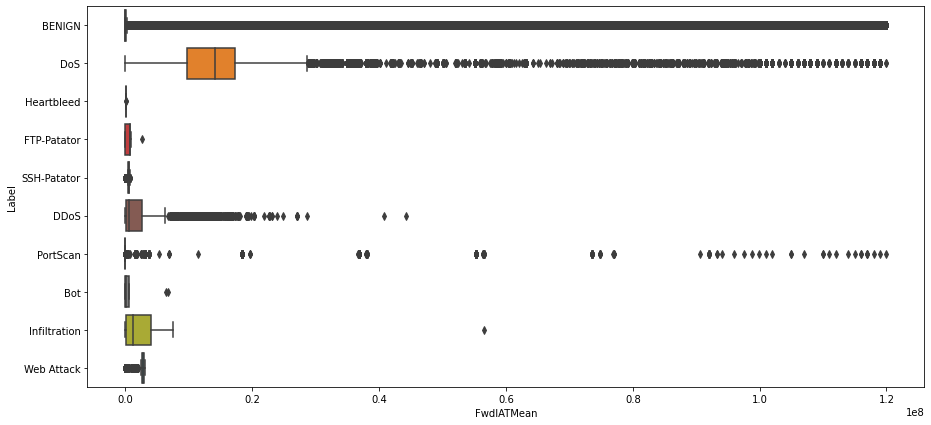

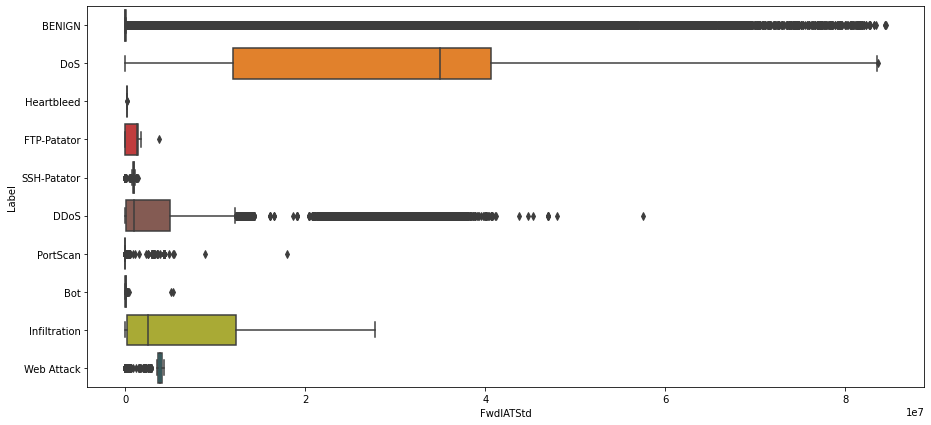

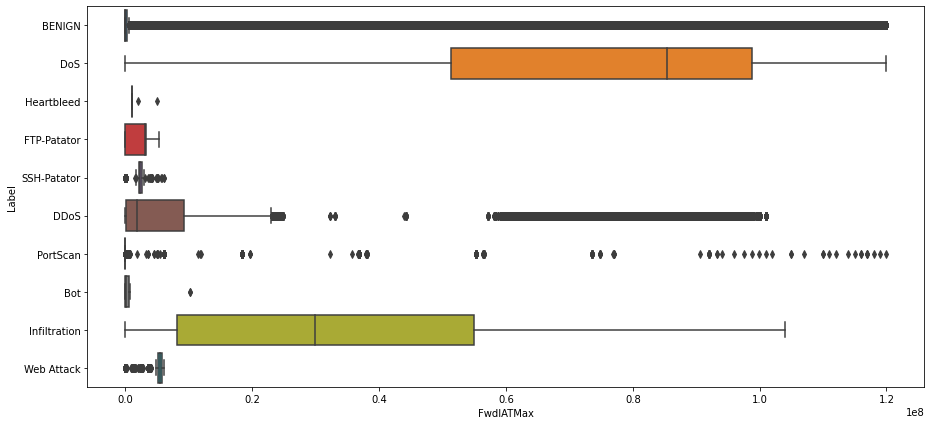

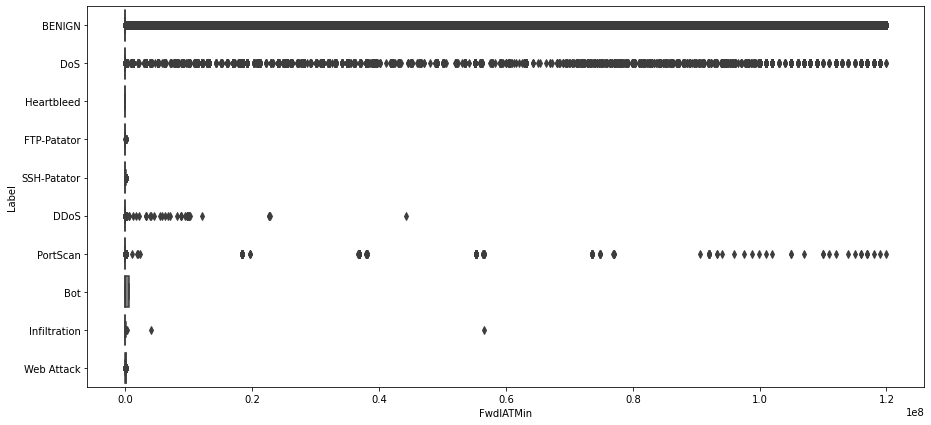

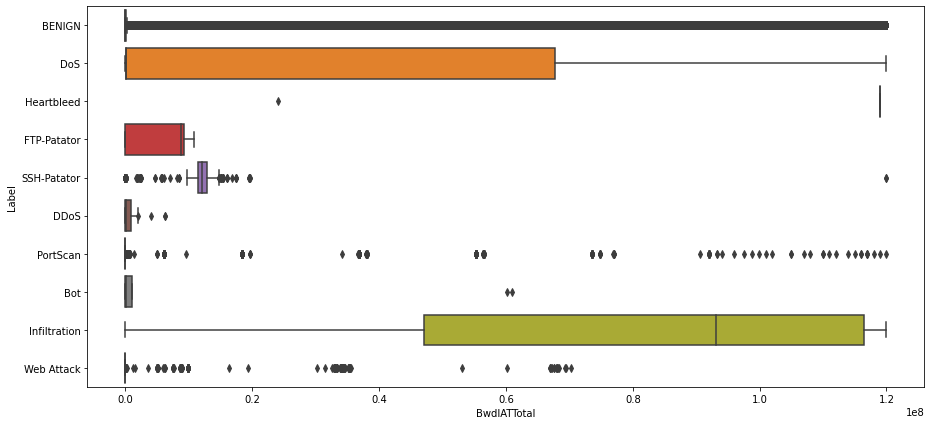

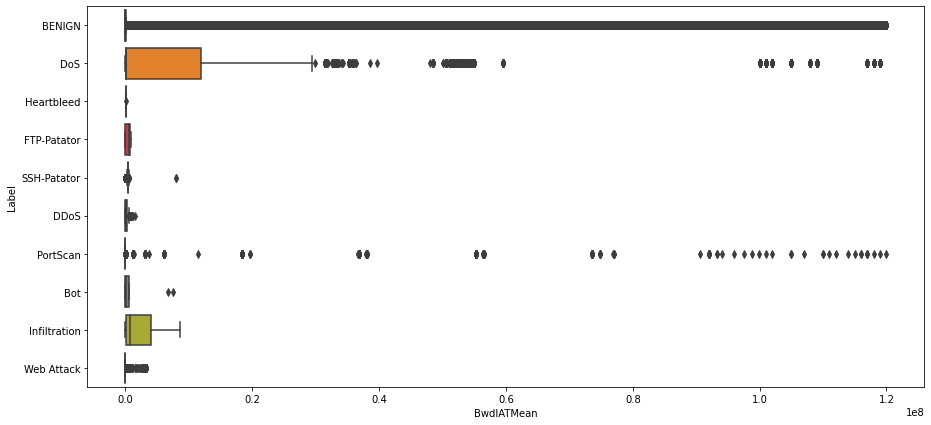

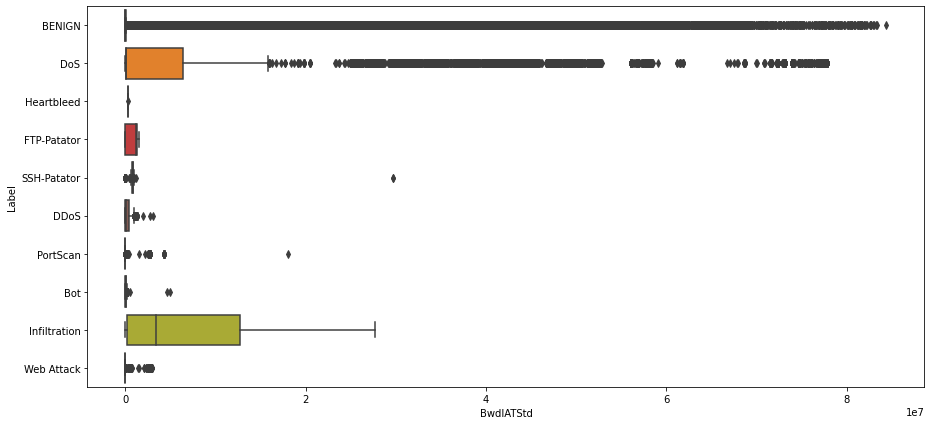

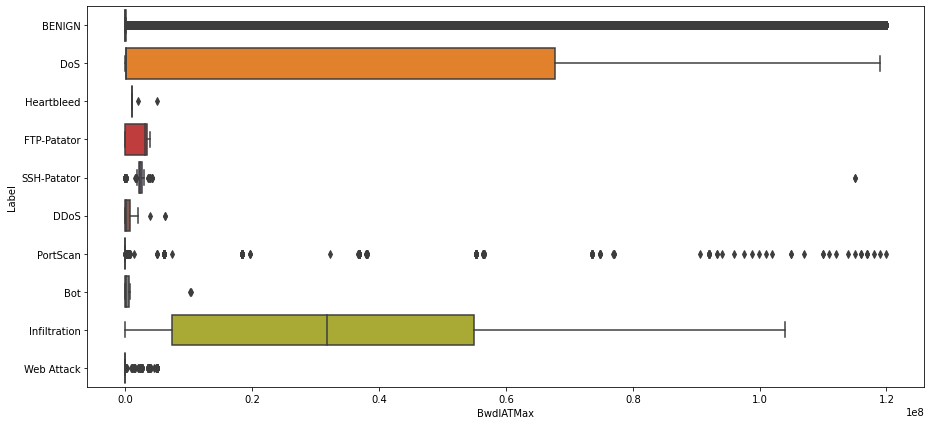

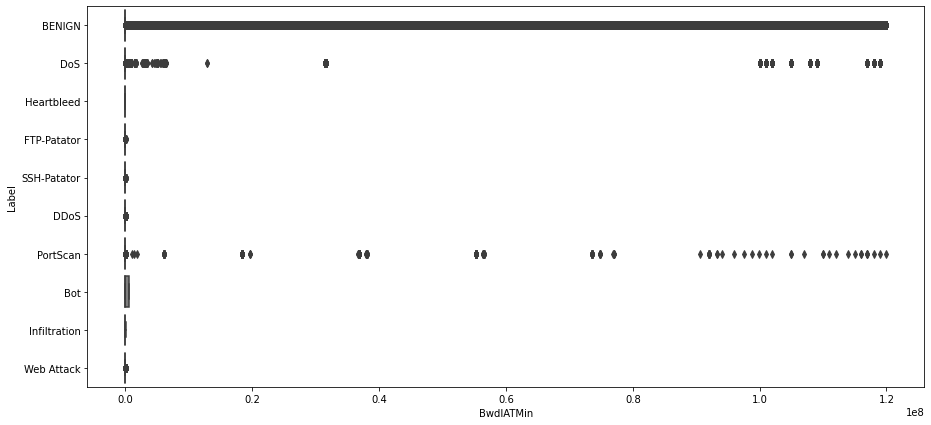

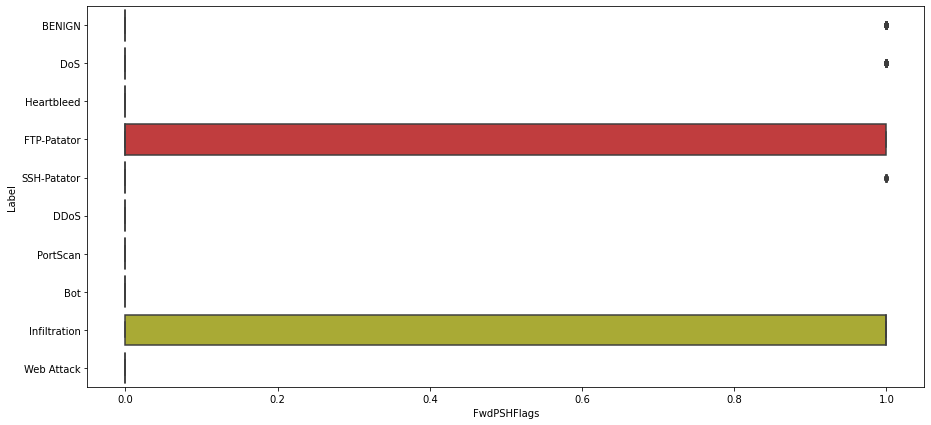

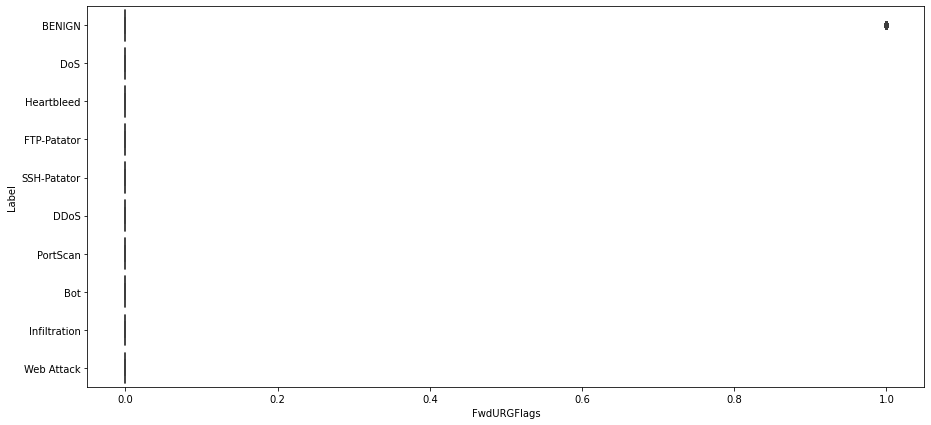

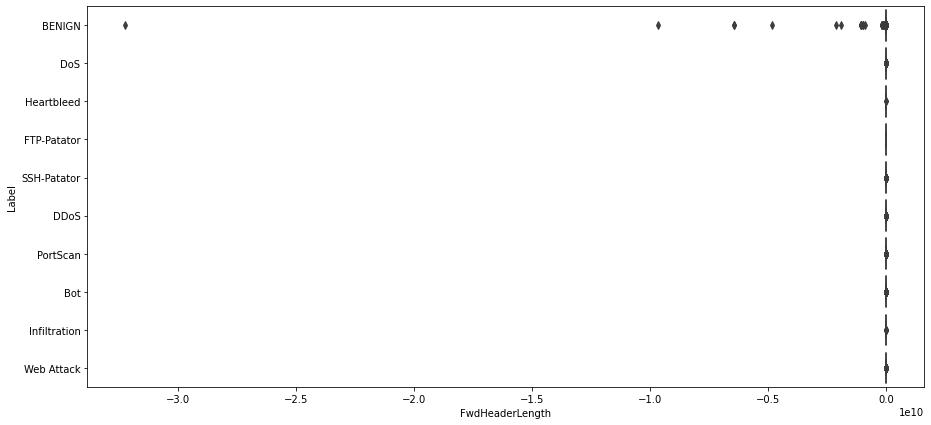

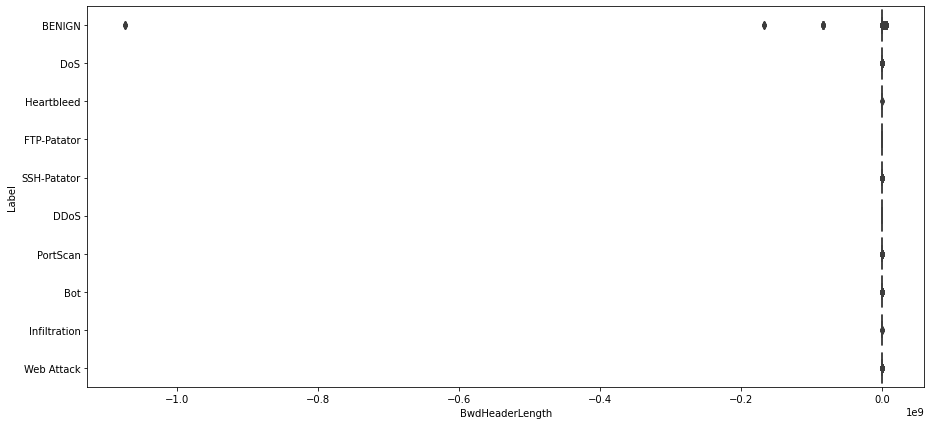

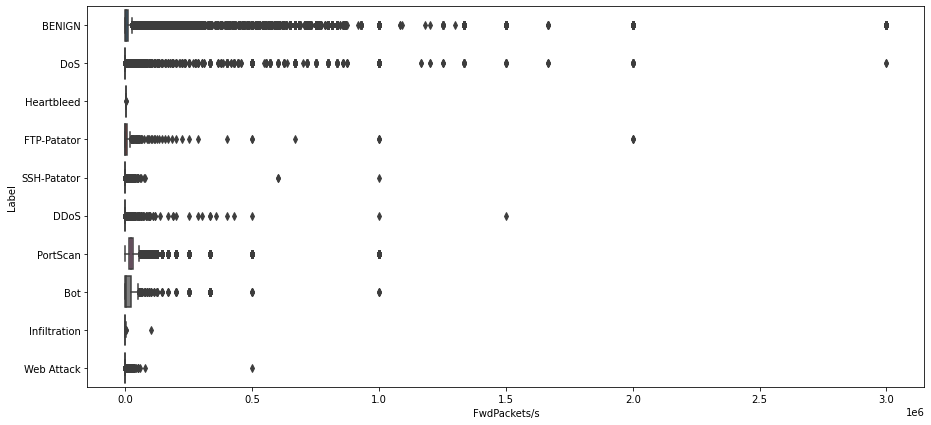

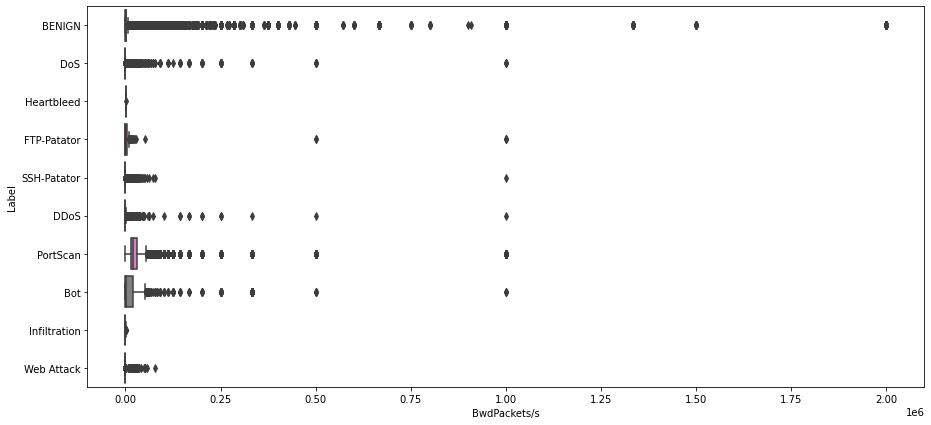

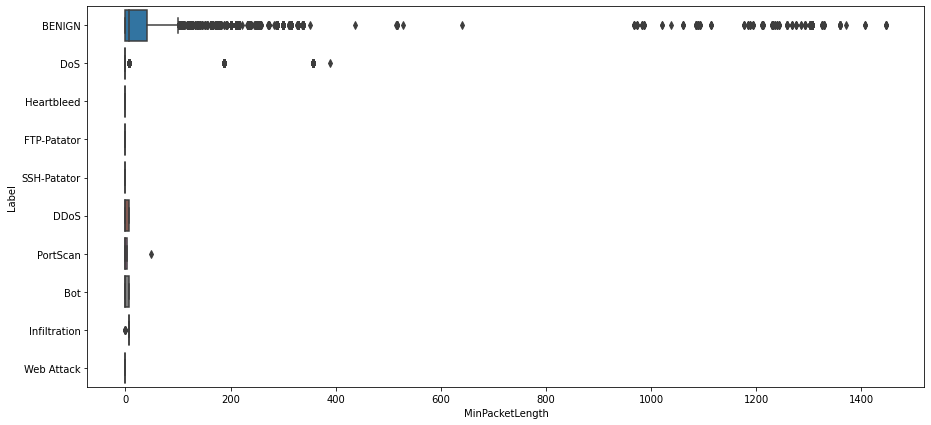

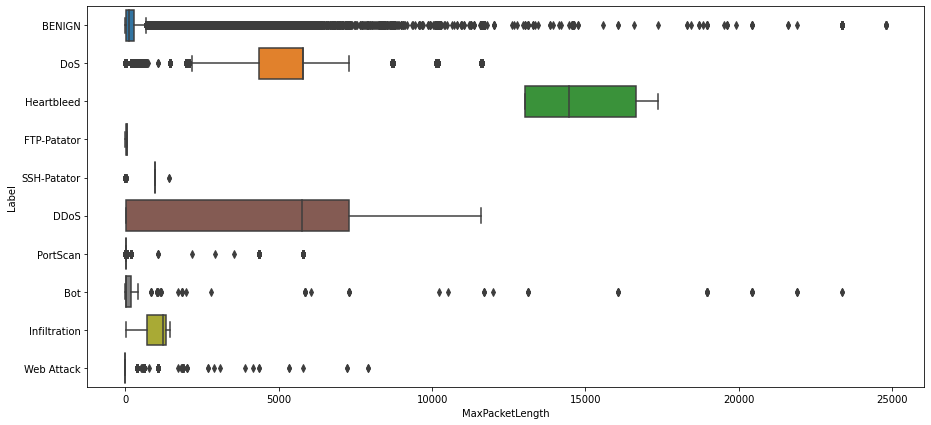

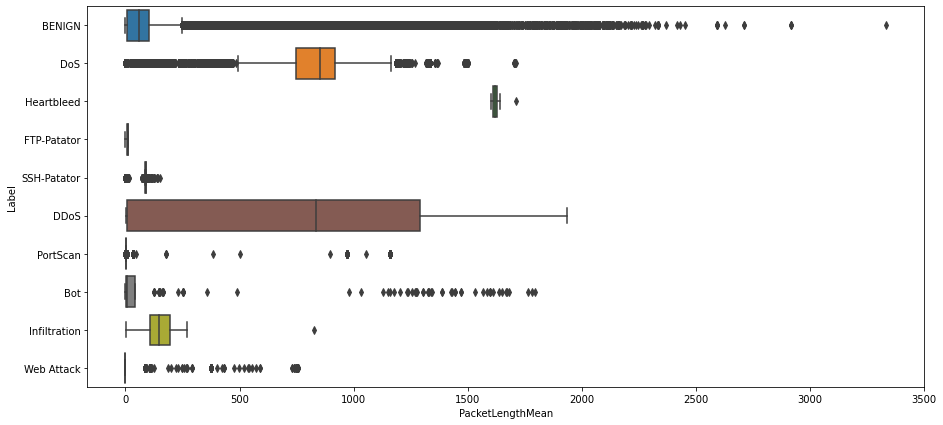

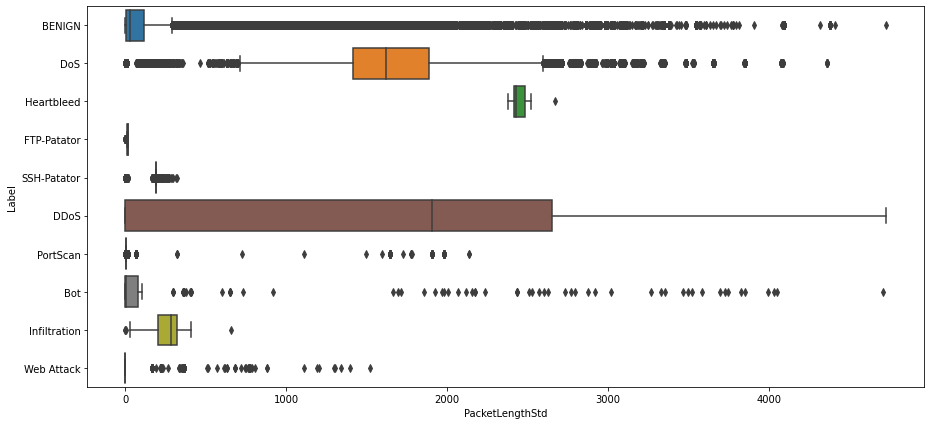

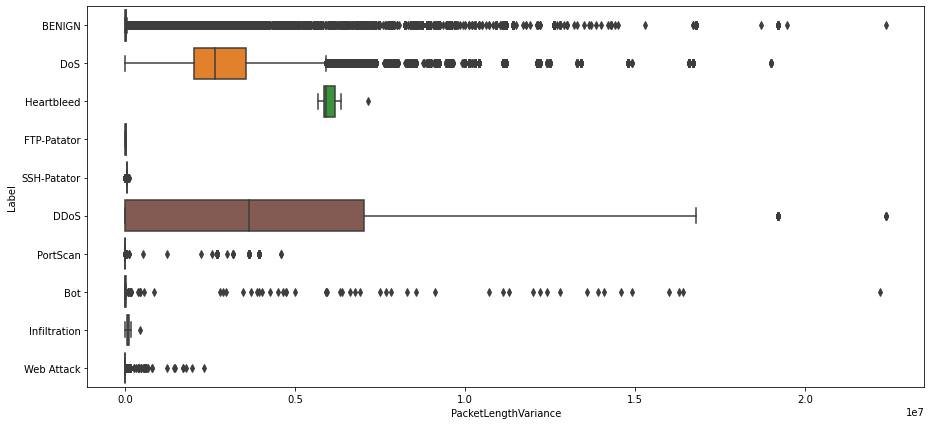

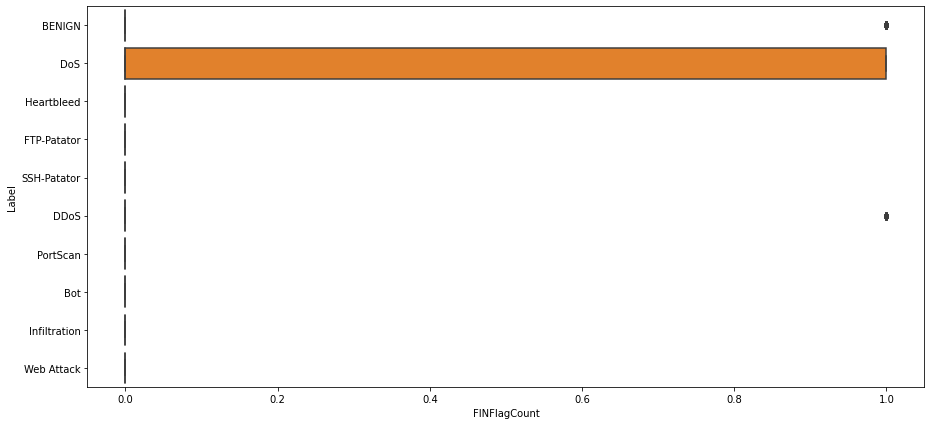

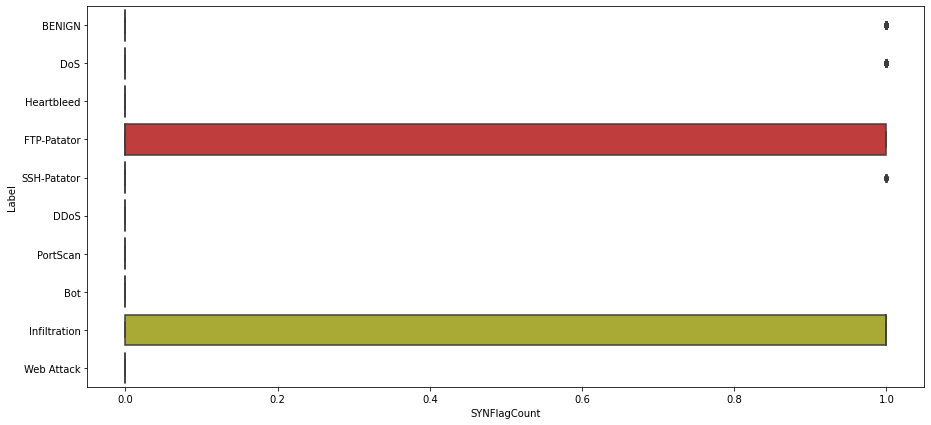

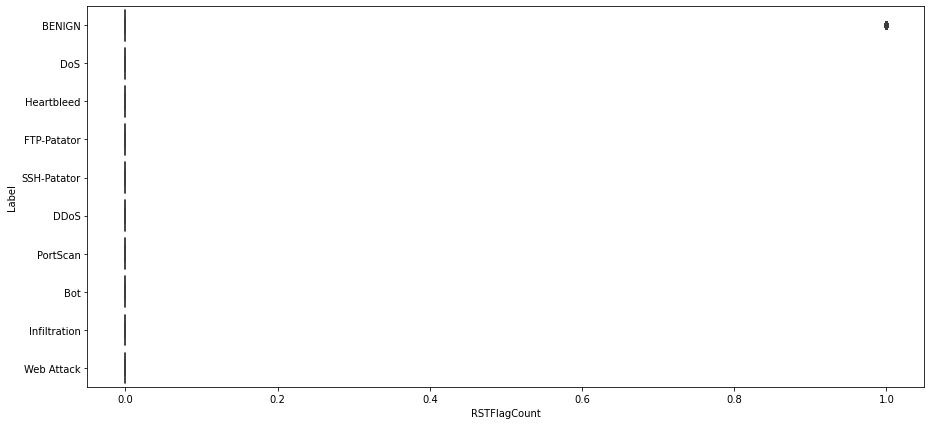

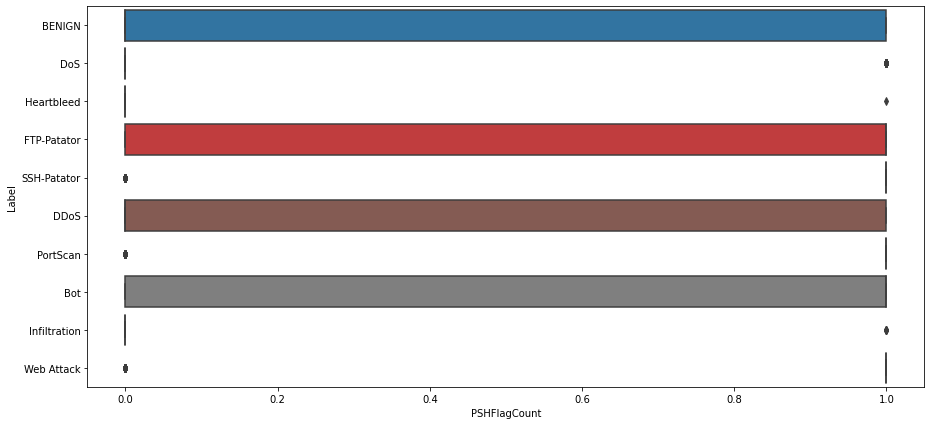

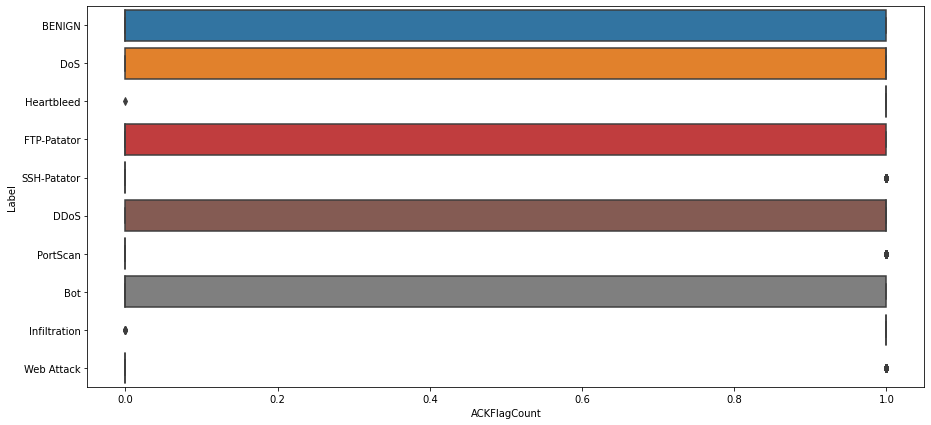

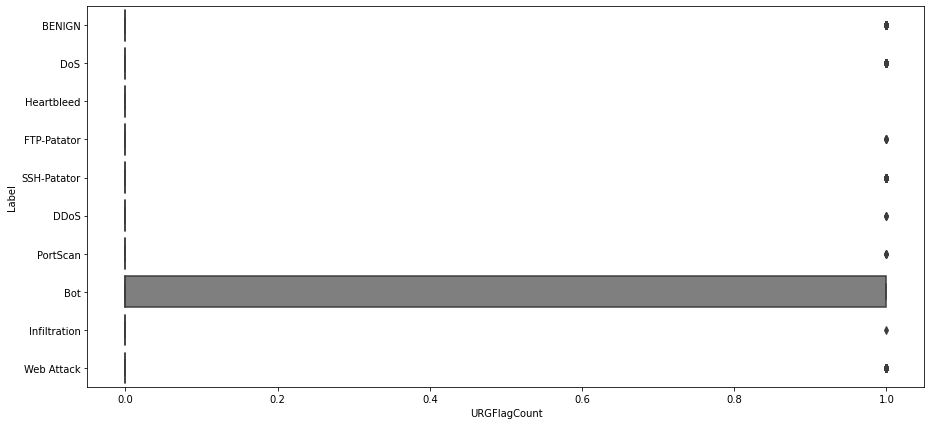

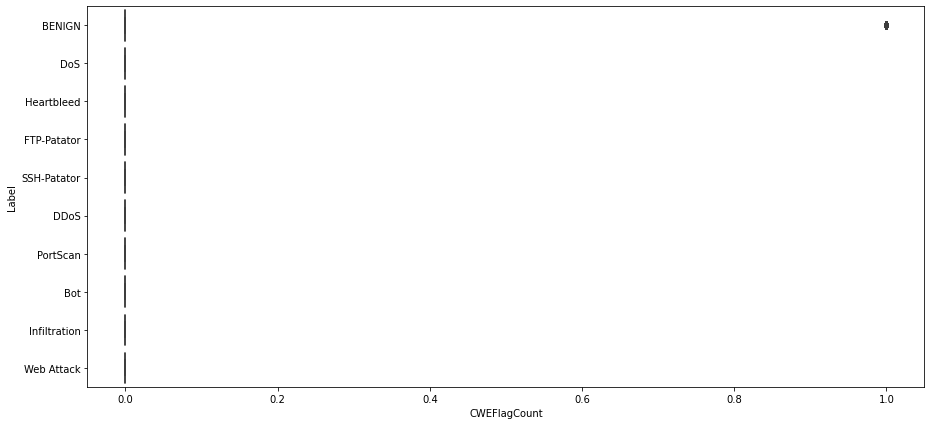

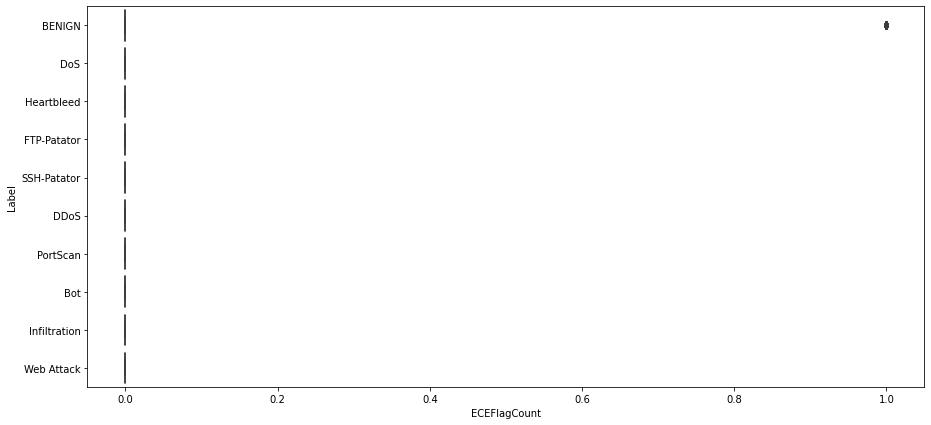

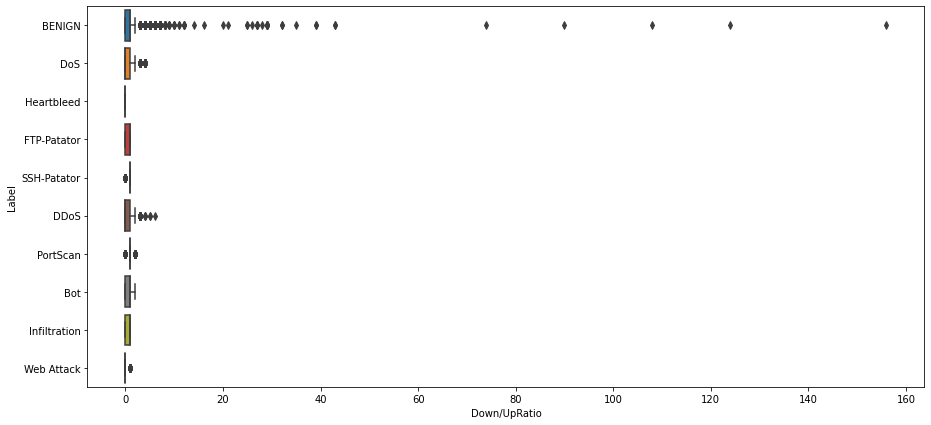

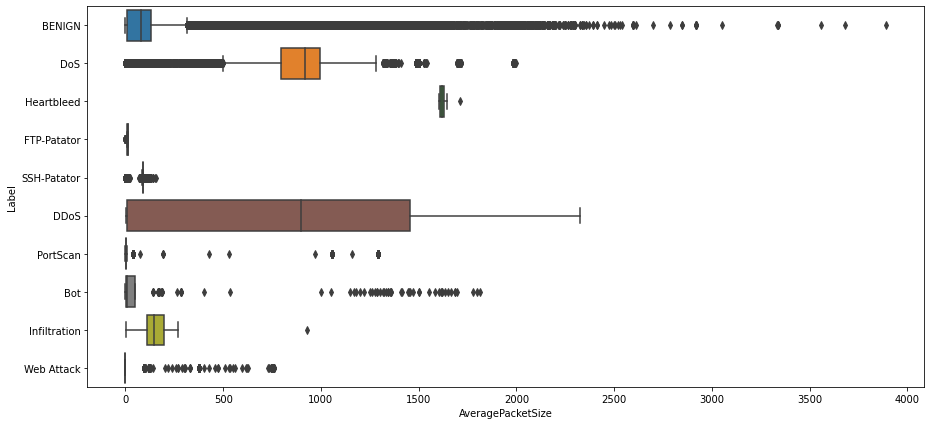

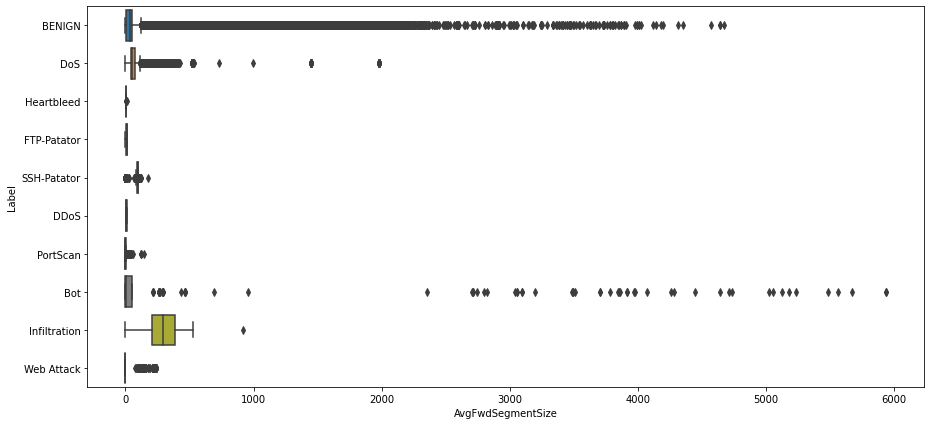

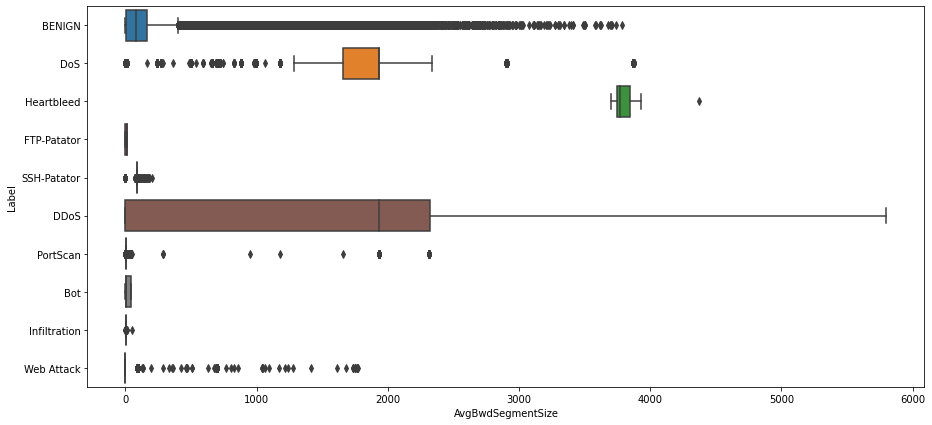

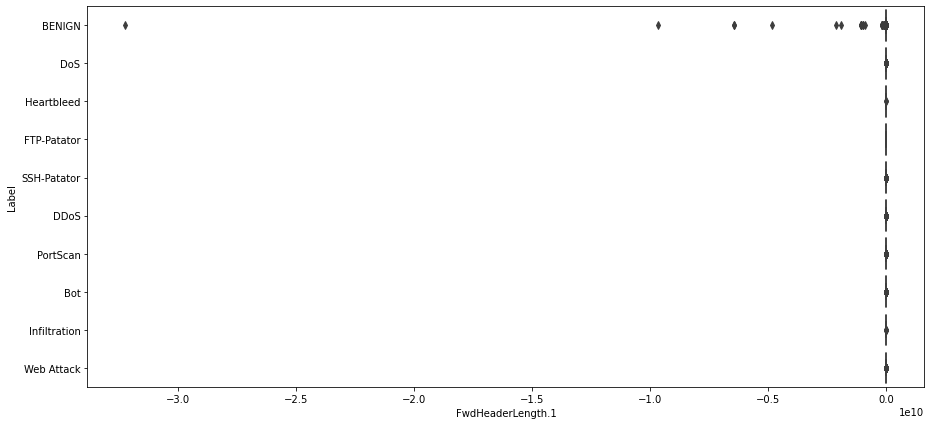

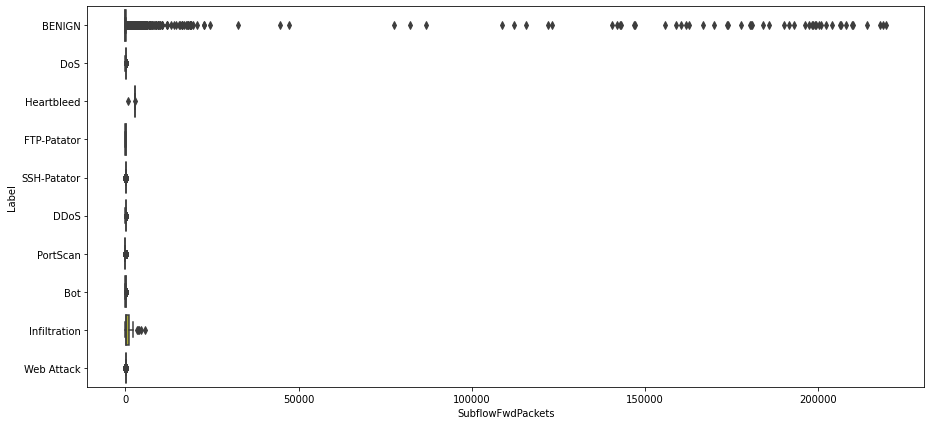

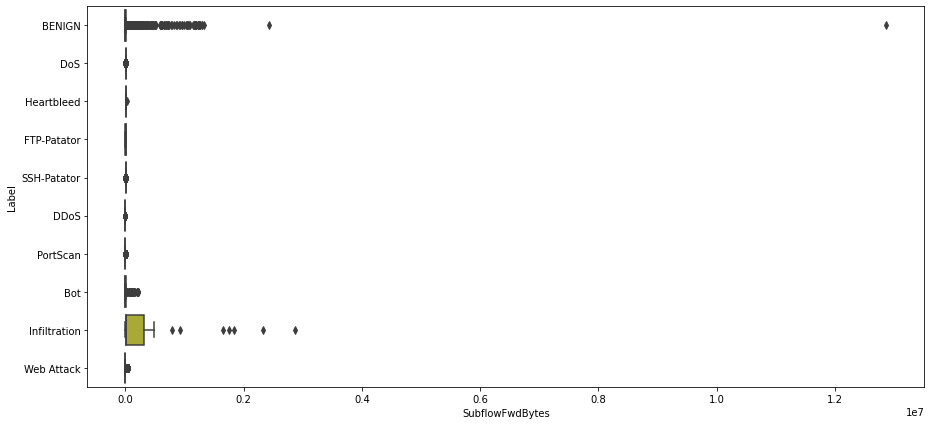

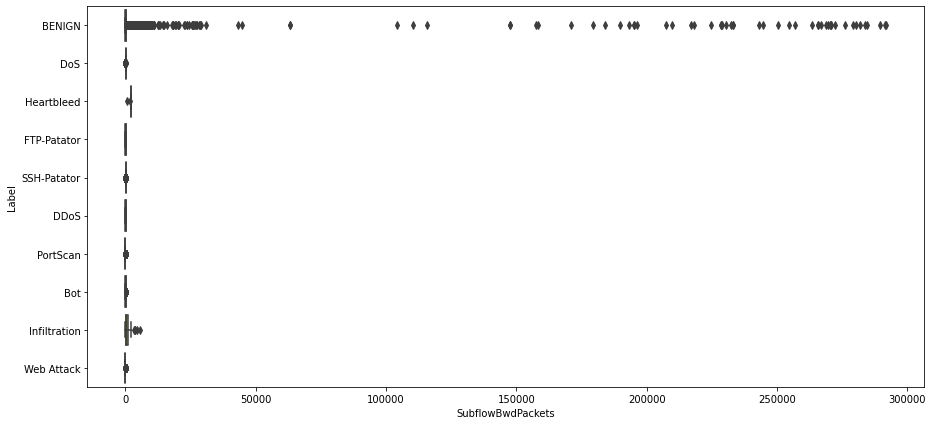

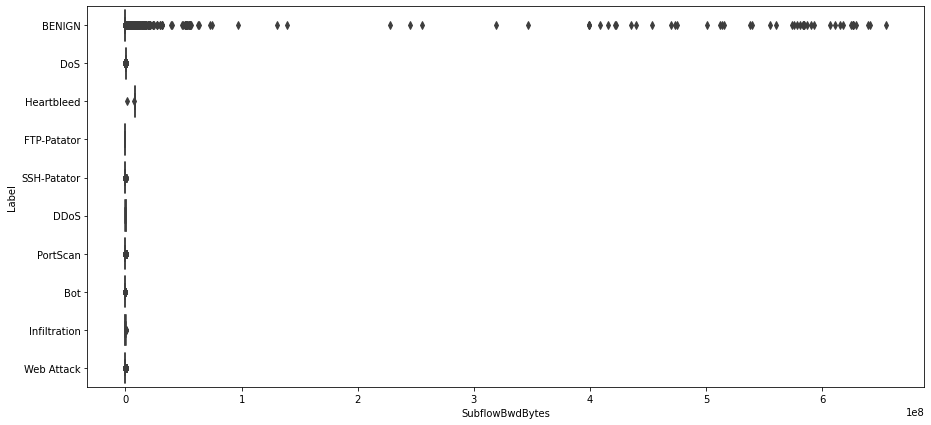

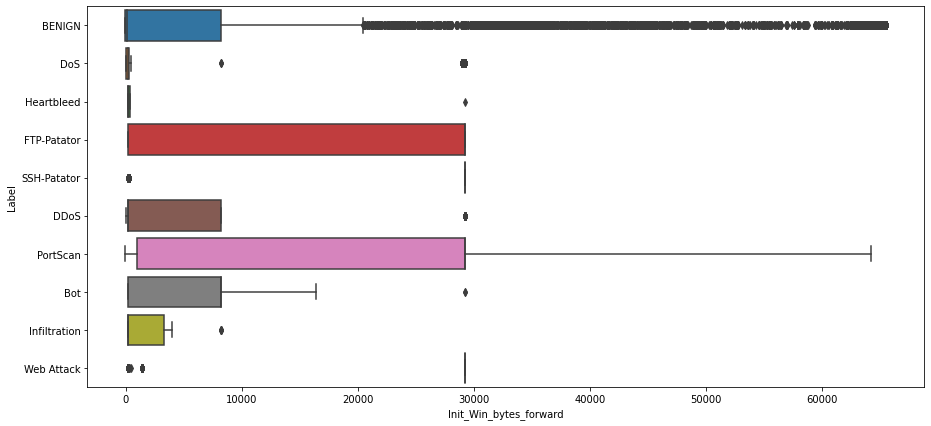

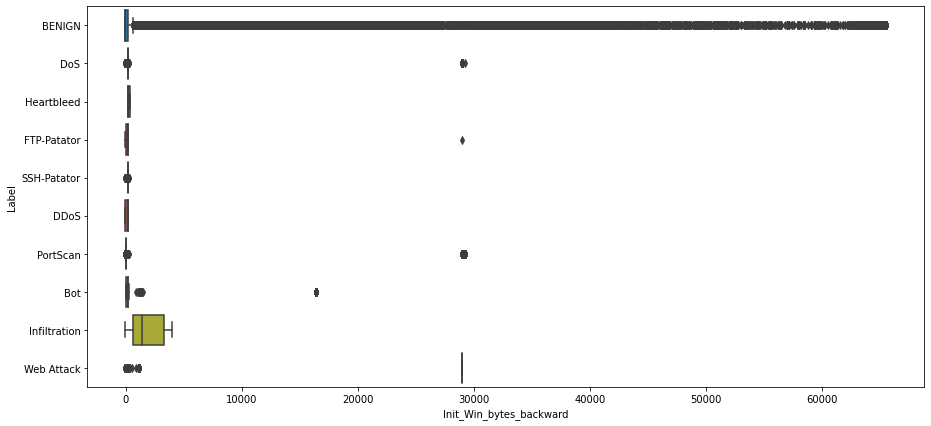

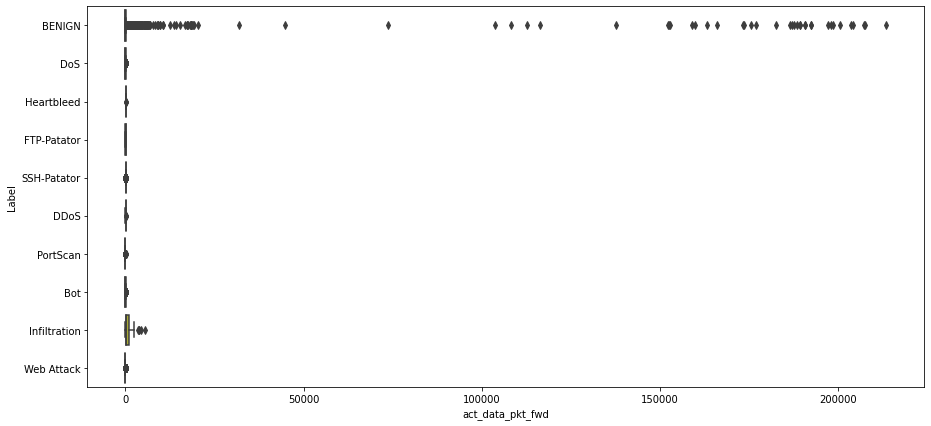

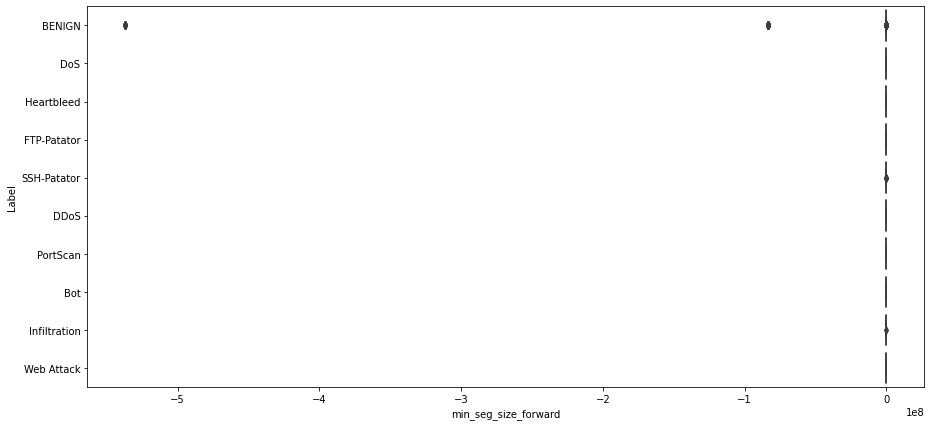

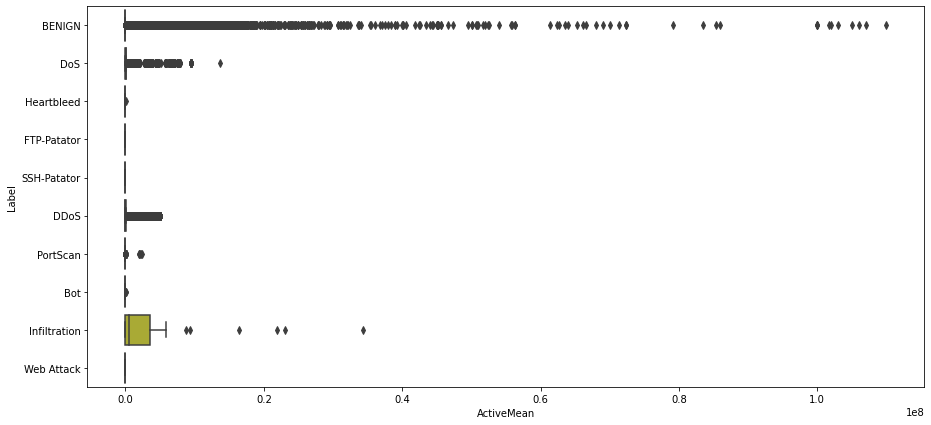

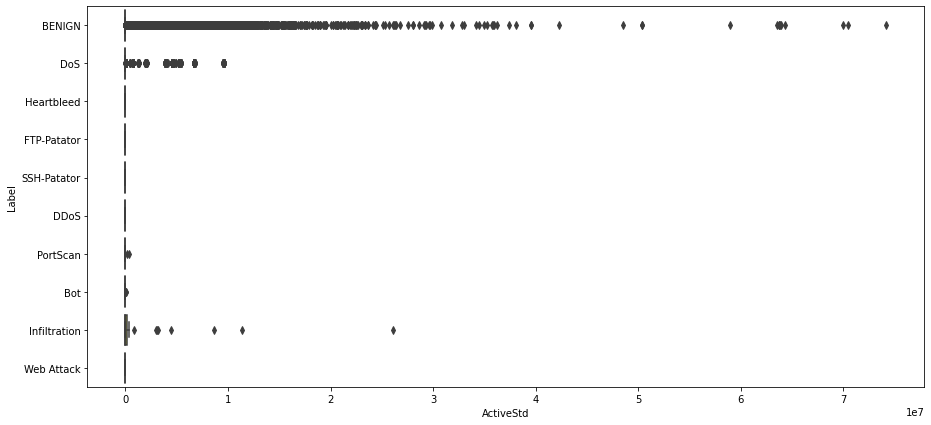

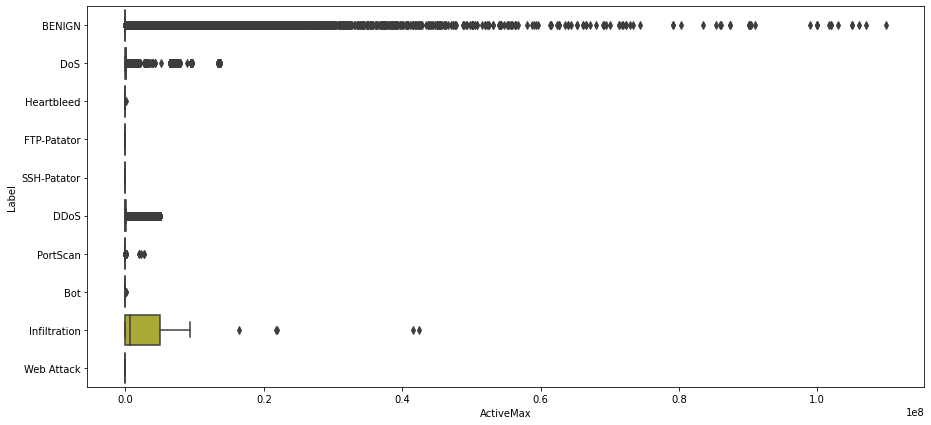

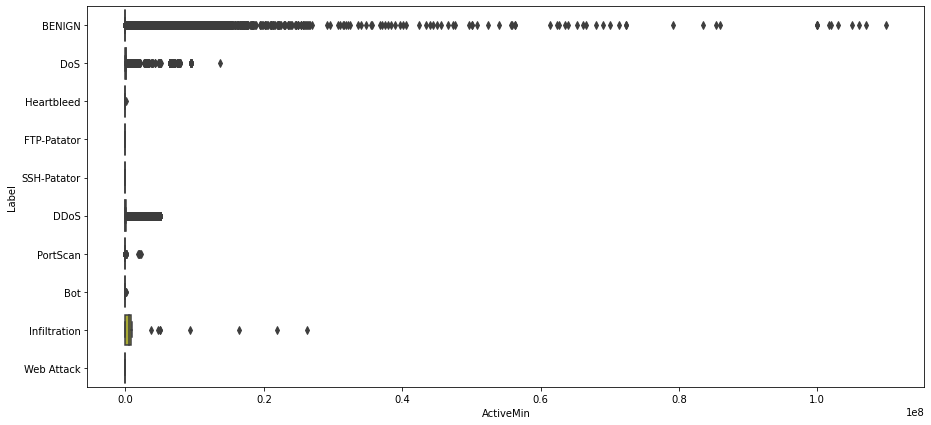

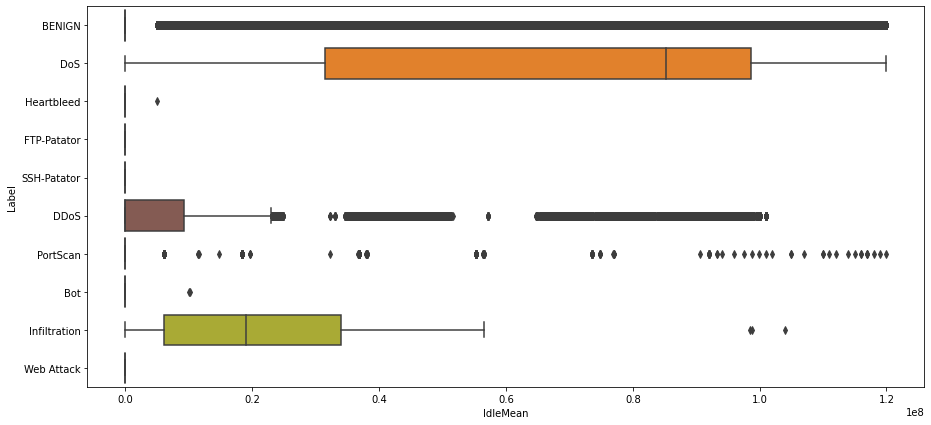

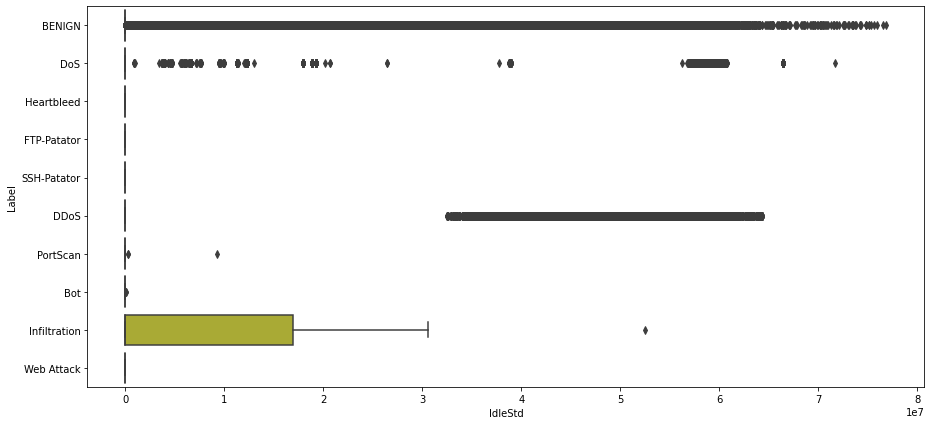

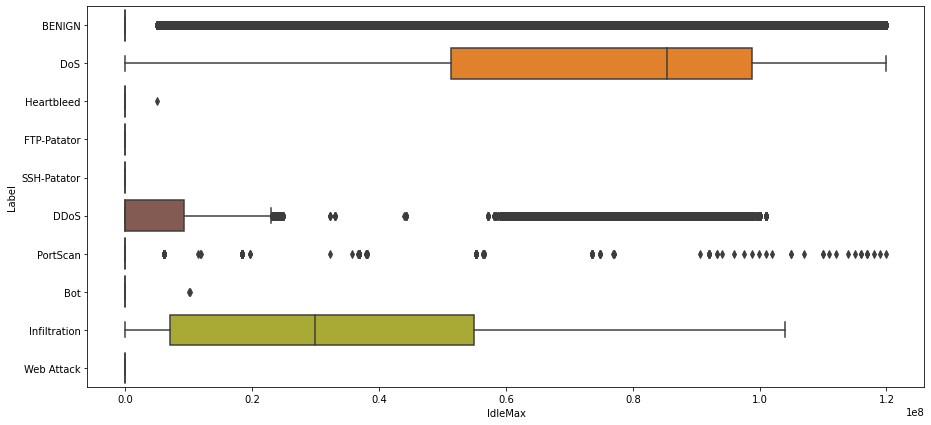

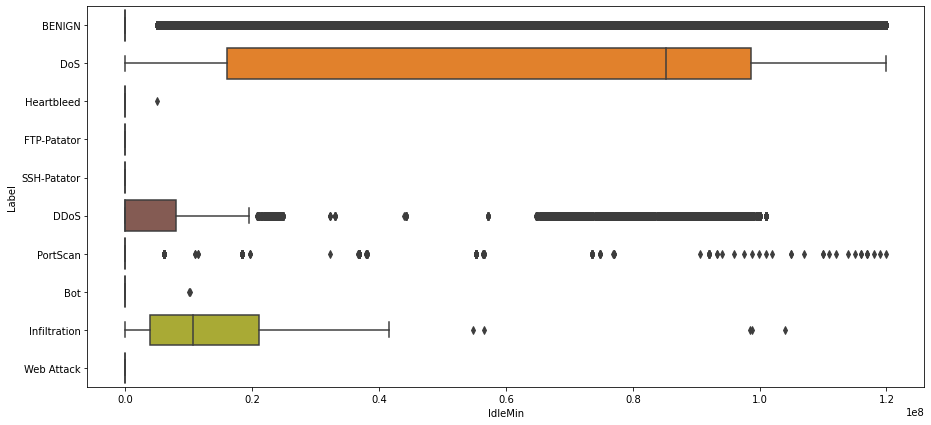

<Figure size 1080x504 with 0 Axes>

In [ ]:
for i in df.columns:
  plt.figure(figsize=(15,7))
  sns.boxplot(data=df, x=i, y='Label')

In [ ]:
colunasInteresse = ['FlowDuration','BwdPacketLengthMax','BwdPacketLengthMean','FlowIATMean','FlowIATMax','FlowIATTotal','MaxPacketLength','PacketLengthMean','AveragePacketSize','AvgBwdSegmentSize','IdleMean','IdleMax']

# Modelos


## Preparando para rodar os modelos (Imports, train test e funções)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
def metricas(y_test, y_pred):
  results = dict()
  results["Accuracy"] = accuracy_score(y_test, y_pred)
  results["F1 Score"] = f1_score(y_test, y_pred)
  return results

In [ ]:
def predict(model, X_train, y_train, X_test, y_test, name):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  metrics = metricas(y_test, y_pred)
  metrics["name"] = name
  return metrics, y_pred

In [ ]:
def matrix(dados):
  plt.figure(figsize=(7,7)),
  plt.title('Confusion Matrix', fontsize=18),
  ax = sns.heatmap(dados, annot=True, cmap='Blues', fmt='.3f')
  ax.set(xlabel='Real', ylabel='Previsto')
  ax.xaxis.tick_top()

In [ ]:
X = df.drop(columns='Label', axis=1)
y = df.Label
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

In [ ]:
attack = []

In [ ]:
class_attack = ['DoS','DDoS','PortScan','FTP-Patator','SSH-Patator','Web Attack','Bot','Infiltration','Heartbleed']

binary_attack_test = y_test.copy()
binary_attack_test.replace(class_attack, value='Attack', inplace=True)
print(binary_attack_test.unique())

binary_attack_train = y_train.copy()
binary_attack_train.replace(class_attack, value='Attack', inplace=True)
print(binary_attack_train.unique())

y_train = binary_attack_train
y_test = binary_attack_test

['BENIGN' 'Attack']
['BENIGN' 'Attack']


In [ ]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

## Modelo Benchmark


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=seed)
bm_metrics, y_pred = predict(lr, X_train, y_train, X_test, y_test, "Benchmark")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


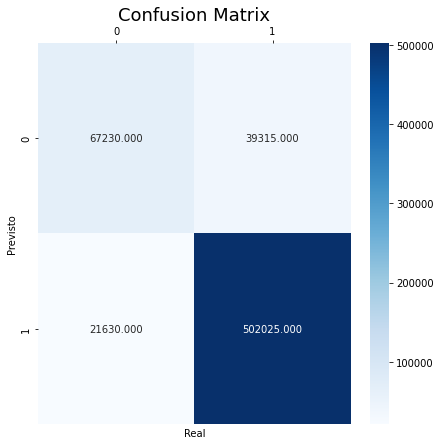

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
matrix(conf_matrix)

In [ ]:
attack.append(bm_metrics)
df_results = pd.DataFrame(attack)
df_results

,Accuracy,F1 Score,name
0,0.903293,0.942774,Benchmark


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth= 3, min_samples_split=2, min_samples_leaf=1, random_state=seed)

In [ ]:
dt_metrics, y_pred = predict(dt, X_train, y_train, X_test, y_test, "Decision Tree")

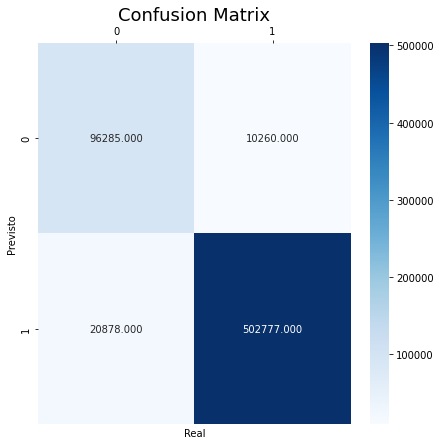

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
matrix(conf_matrix)

In [ ]:
attack.append(dt_metrics)
df_results = pd.DataFrame(attack)
df_results

,Accuracy,F1 Score,name
0,0.903293,0.942774,Benchmark
1,0.950590,0.969964,Decision Tree


## Decision Tree GridCV


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = [{'max_depth': [1, 2, 3, 4, 5]},
          {'min_samples_split': [1, 2, 3, 4, 5]},
          {'min_samples_leaf':[1, 2, 3, 4, 5]},
          ]

In [ ]:
gsdt = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5)

In [ ]:
gsdt.fit(X_train, y_train)

KeyboardInterrupt: ignored

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(max_depth=5, random_state=seed)

In [ ]:
rf_metrics, y_pred = predict(rf, X_train, y_train, X_test, y_test, "Random Forest")

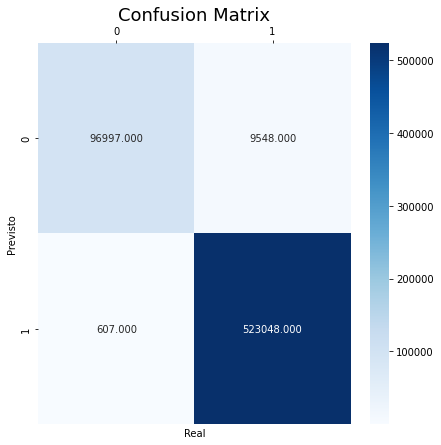

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
matrix(conf_matrix)

In [ ]:
attack.append(rf_metrics)
df_results = pd.DataFrame(attack)
df_results

,Accuracy,F1 Score,name
0,0.903293,0.942774,Benchmark
1,0.950590,0.969964,Decision Tree
2,0.950590,0.969964,Decision Tree
3,0.983886,0.990386,Random Forest
